In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy


sc.settings.verbosity = 3         # verbosity: errors (0), warnings (1), info (2), hints (3)
# gives error!! sc.logging.print_versions()

import warnings
warnings.filterwarnings('ignore')

sc.settings.set_figure_params(dpi=80)

In [2]:
adata = sc.read_h5ad('./data/h5ab_folder/gse159812_raw_covid.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 121622 × 36601
    obs: 'sample', 'batch'
    var: 'gene_id'

In [4]:
adata.obs

sample  batch
AAACCCAAGGCTTTCA   COVID-19_1      0
AAACCCACAGGTATGG   COVID-19_1      0
AAACCCATCGAGTACT   COVID-19_1      0
AAACCCATCGTGGTAT   COVID-19_1      0
AAACGAAAGAAGAACG   COVID-19_1      0
...                       ...    ...
TTTGGTTCACAACGCC  COVID-19_15     29
TTTGGTTGTACAAGCG  COVID-19_15     29
TTTGTTGAGCCGTAAG  COVID-19_15     29
TTTGTTGCAAGCGGAT  COVID-19_15     29
TTTGTTGGTATACAGA  COVID-19_15     29

[121622 rows x 2 columns]

In [5]:
adata.var

gene_id
gene_symbol                 
MIR1302-2HG  ENSG00000243485
FAM138A      ENSG00000237613
OR4F5        ENSG00000186092
AL627309.1   ENSG00000238009
AL627309.3   ENSG00000239945
...                      ...
AC141272.1   ENSG00000277836
AC023491.2   ENSG00000278633
AC007325.1   ENSG00000276017
AC007325.4   ENSG00000278817
AC007325.2   ENSG00000277196

[36601 rows x 1 columns]

In [6]:
print(adata.obs['sample'].value_counts())

COVID-19_9     6825
Control_12     6806
COVID-19_1     6685
COVID-19_11    6012
COVID-19_8     5994
COVID-19_3     5906
COVID-19_7     5027
Control_2      4885
Control_9      4635
COVID-19_4     4589
Influenza_2    4460
COVID-19_12    4395
Control_10     4301
Control_13     4239
Control_6      4176
Control_11     3908
COVID-19_5     3771
COVID-19_15    3681
Control_8      3579
Control_7      3362
COVID-19_14    3125
Control_5      2998
Influenza_1    2833
Control_4      2817
Control_1      2530
COVID-19_2     2443
Control_3      2341
COVID-19_6     2131
COVID-19_10    1787
COVID-19_13    1381
Name: sample, dtype: int64


In [7]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))

adata.var

gene_id     mt   ribo     hb
gene_symbol                                      
MIR1302-2HG  ENSG00000243485  False  False  False
FAM138A      ENSG00000237613  False  False  False
OR4F5        ENSG00000186092  False  False  False
AL627309.1   ENSG00000238009  False  False  False
AL627309.3   ENSG00000239945  False  False  False
...                      ...    ...    ...    ...
AC141272.1   ENSG00000277836  False  False  False
AC023491.2   ENSG00000278633  False  False  False
AC007325.1   ENSG00000276017  False  False  False
AC007325.4   ENSG00000278817  False  False  False
AC007325.2   ENSG00000277196  False  False  False

[36601 rows x 4 columns]

In [8]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [9]:
adata.obs

sample  batch  n_genes_by_counts  total_counts  \
AAACCCAAGGCTTTCA   COVID-19_1      0               2089        3665.0   
AAACCCACAGGTATGG   COVID-19_1      0               1716        3132.0   
AAACCCATCGAGTACT   COVID-19_1      0               4228        9130.0   
AAACCCATCGTGGTAT   COVID-19_1      0                479         563.0   
AAACGAAAGAAGAACG   COVID-19_1      0               2468        4163.0   
...                       ...    ...                ...           ...   
TTTGGTTCACAACGCC  COVID-19_15     29               3667        8992.0   
TTTGGTTGTACAAGCG  COVID-19_15     29                602         856.0   
TTTGTTGAGCCGTAAG  COVID-19_15     29                958        1469.0   
TTTGTTGCAAGCGGAT  COVID-19_15     29               2297        5004.0   
TTTGTTGGTATACAGA  COVID-19_15     29                534         790.0   

                  total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCAAGGCTTTCA              1.0       0.027285               11.0   
AAACCCACAGGTATGG              1.0       0.031928                8.0   
AAACCCATCGAGTACT             37.0       0.405257               34.0   
AAACCCATCGTGGTAT              0.0       0.000000                4.0   
AAACGAAAGAAGAACG              8.0       0.192169               35.0   
...                           ...            ...                ...   
TTTGGTTCACAACGCC            181.0       2.012900               86.0   
TTTGGTTGTACAAGCG             51.0       5.957944                6.0   
TTTGTTGAGCCGTAAG            131.0       8.917631                4.0   
TTTGTTGCAAGCGGAT            800.0      15.987210               35.0   
TTTGTTGGTATACAGA            120.0      15.189873               62.0   

                  pct_counts_ribo  total_counts_hb  pct_counts_hb  
AAACCCAAGGCTTTCA         0.300136              0.0       0.000000  
AAACCCACAGGTATGG         0.255428              0.0       0.000000  
AAACCCATCGAGTACT         0.372399              2.0       0.021906  
AAACCCATCGTGGTAT         0.710480              0.0       0.000000  
AAACGAAAGAAGAACG         0.840740              0.0       0.000000  
...                           ...              ...            ...  
TTTGGTTCACAACGCC         0.956406              2.0       0.022242  
TTTGGTTGTACAAGCG         0.700935              0.0       0.000000  
TTTGTTGAGCCGTAAG         0.272294              1.0       0.068074  
TTTGTTGCAAGCGGAT         0.699440              0.0       0.000000  
TTTGTTGGTATACAGA         7.848101              0.0       0.000000  

[121622 rows x 10 columns]

In [10]:
# Check whethe the matrix: adata.X is sparse or not.
scipy.sparse.issparse(adata.X)

False

In [11]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
# adata.obs['percent_mt2'] = np.sum(
#     adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# # add the total counts per cell as observations-annotation to adata
# adata.obs['n_counts'] = adata.X.sum(axis=1).A1


adata.obs['percent_mt2'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)

In [12]:
adata

AnnData object with n_obs × n_vars = 121622 × 36601
    obs: 'sample', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_mt2', 'n_counts'
    var: 'gene_id', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [13]:
sc.set_figure_params(figsize=(14, 8))

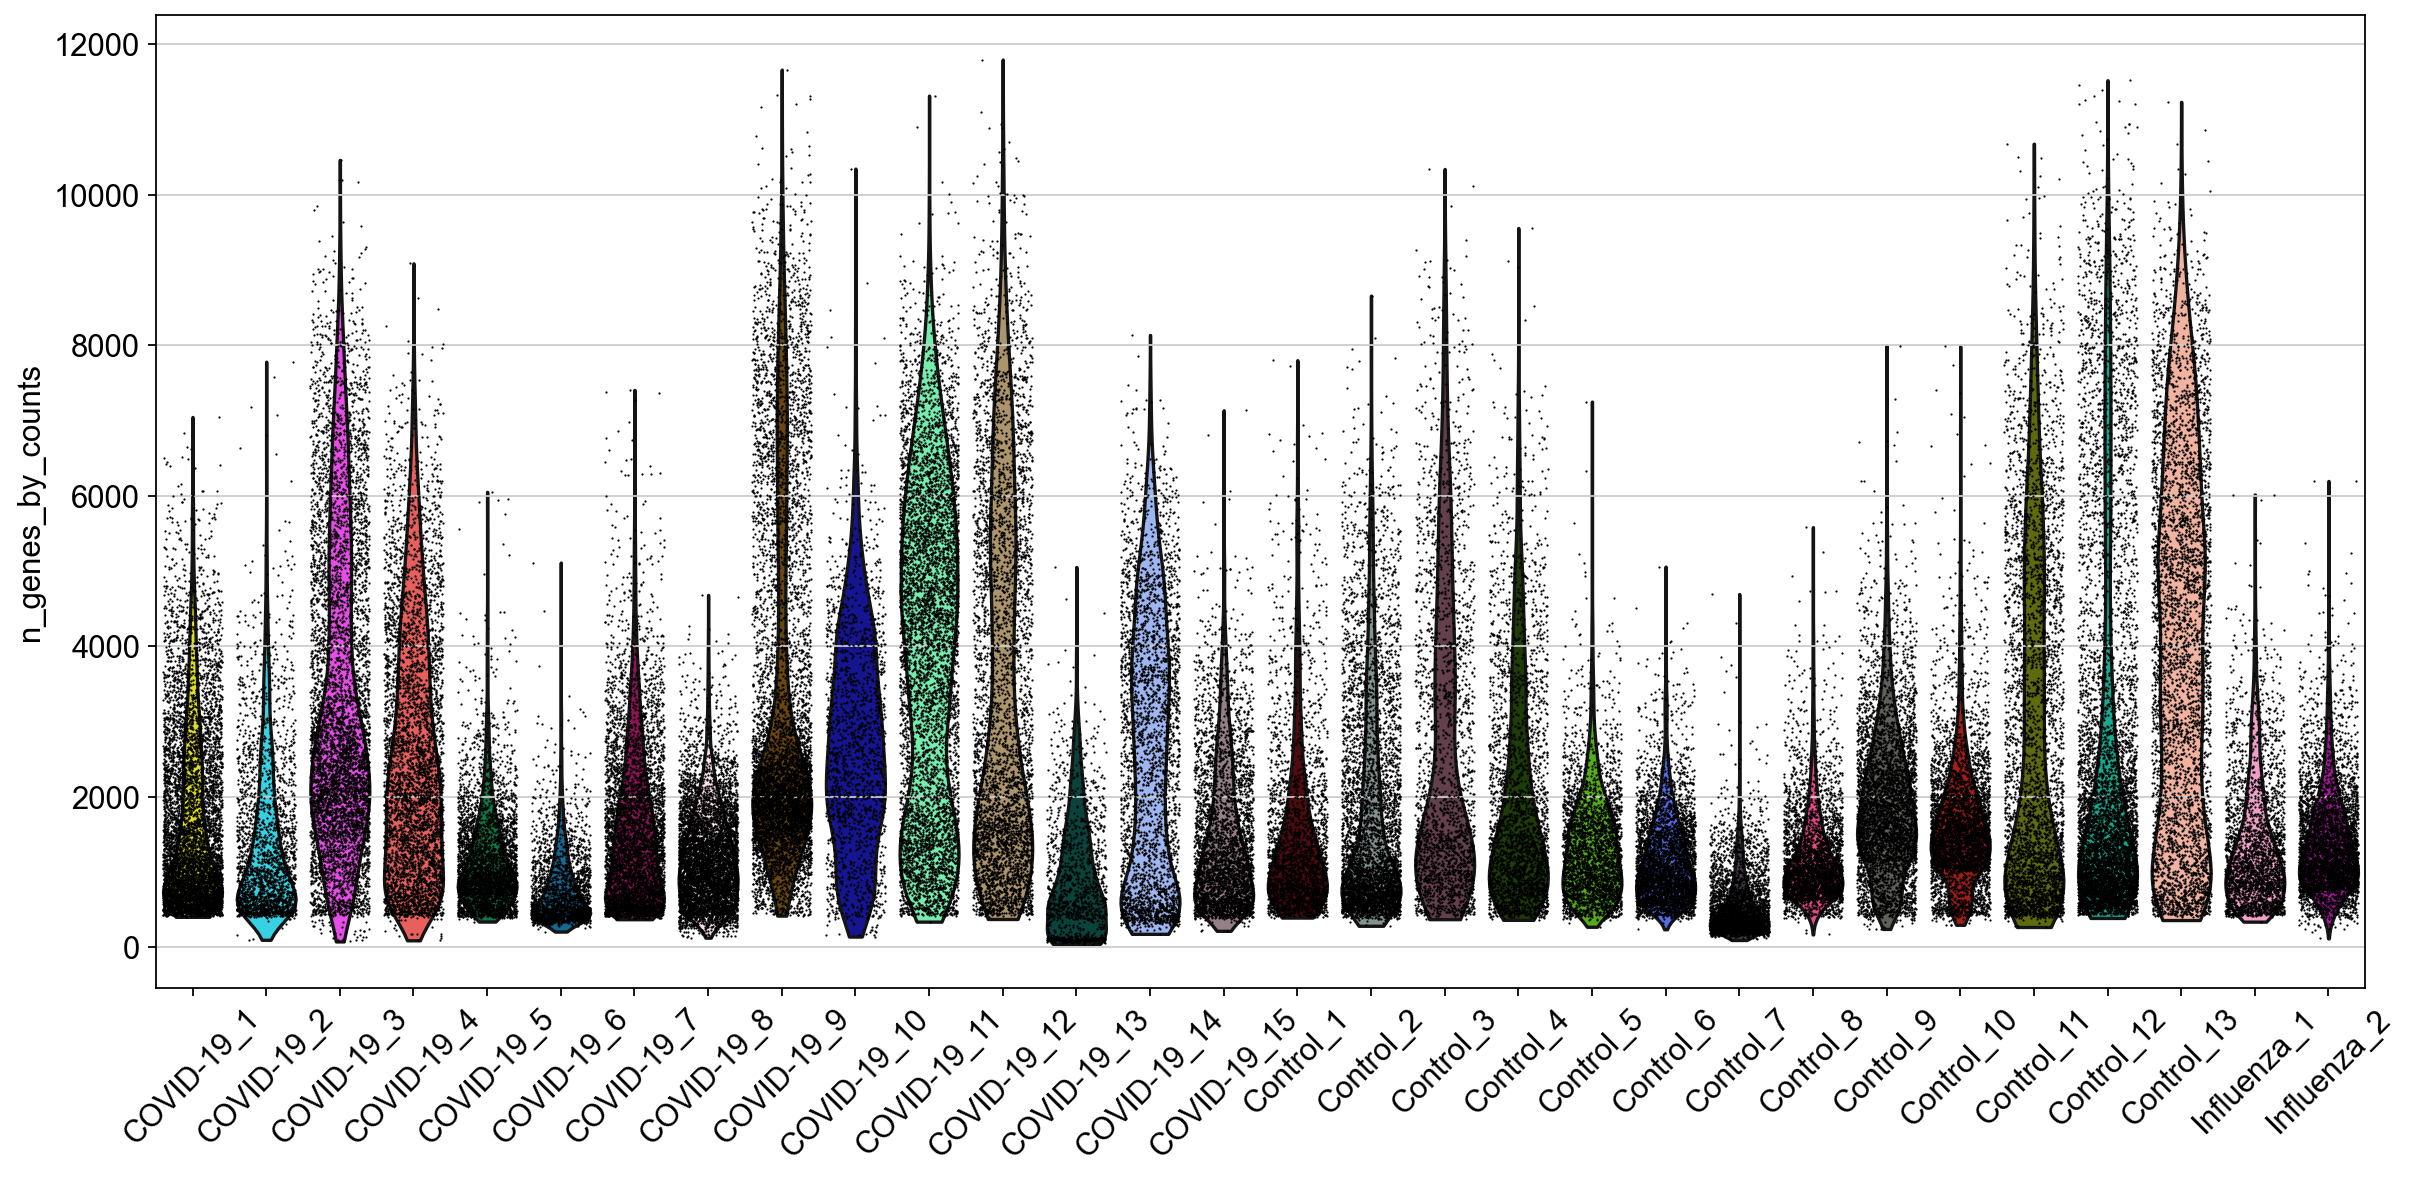

In [14]:
sc.pl.violin(adata, ['n_genes_by_counts'],
             jitter=0.4, groupby = 'sample', rotation= 45)

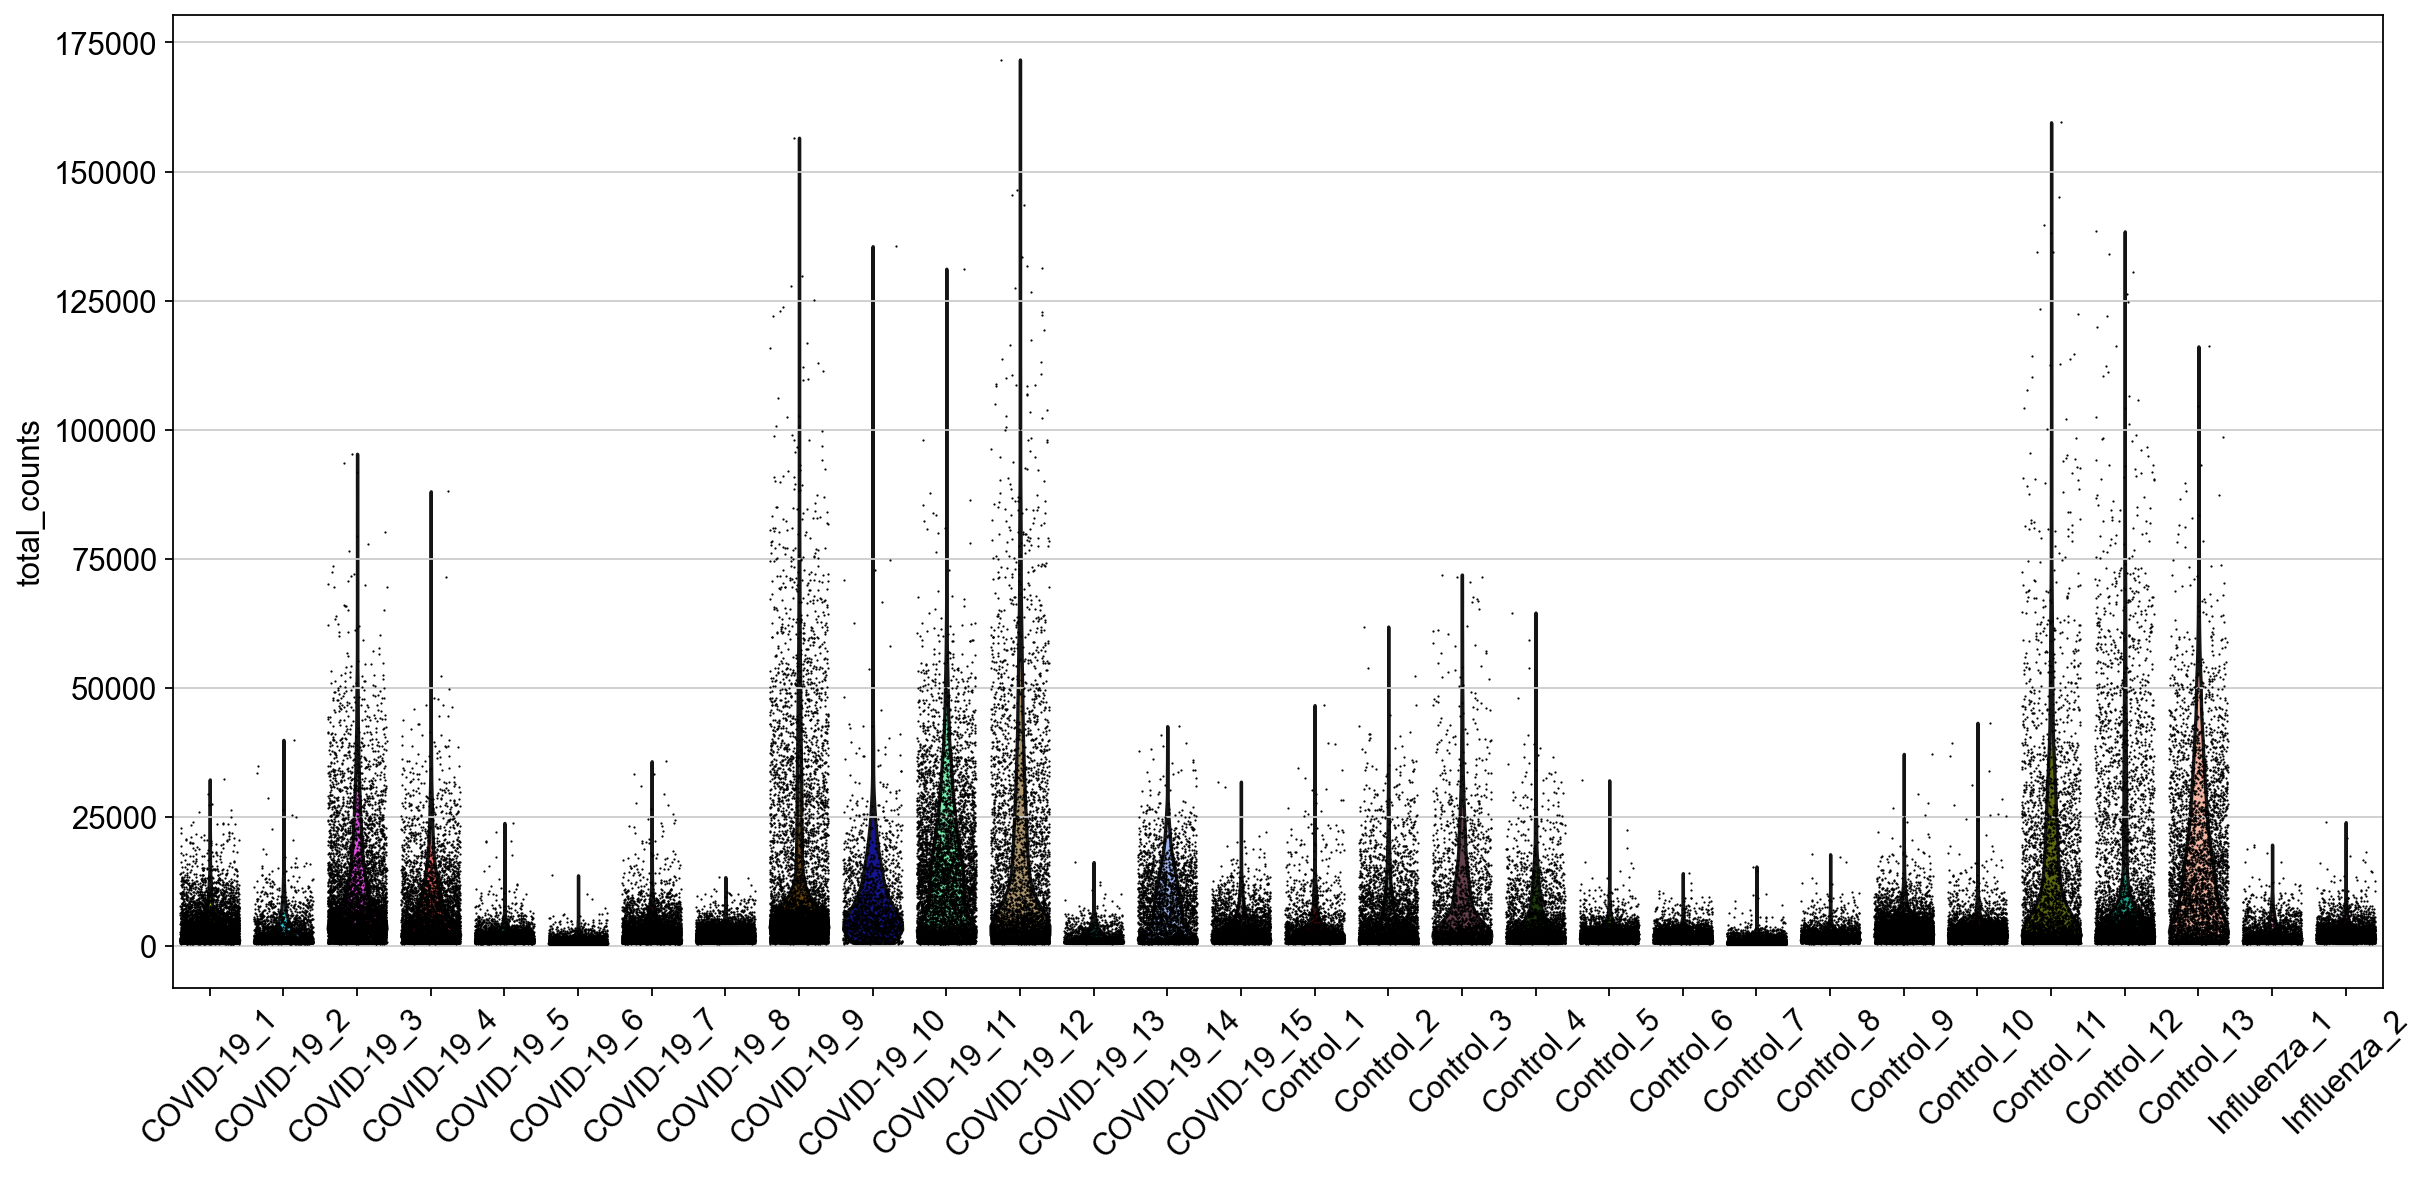

In [15]:
sc.pl.violin(adata, ['total_counts'],
             jitter=0.4, groupby = 'sample', rotation= 45)

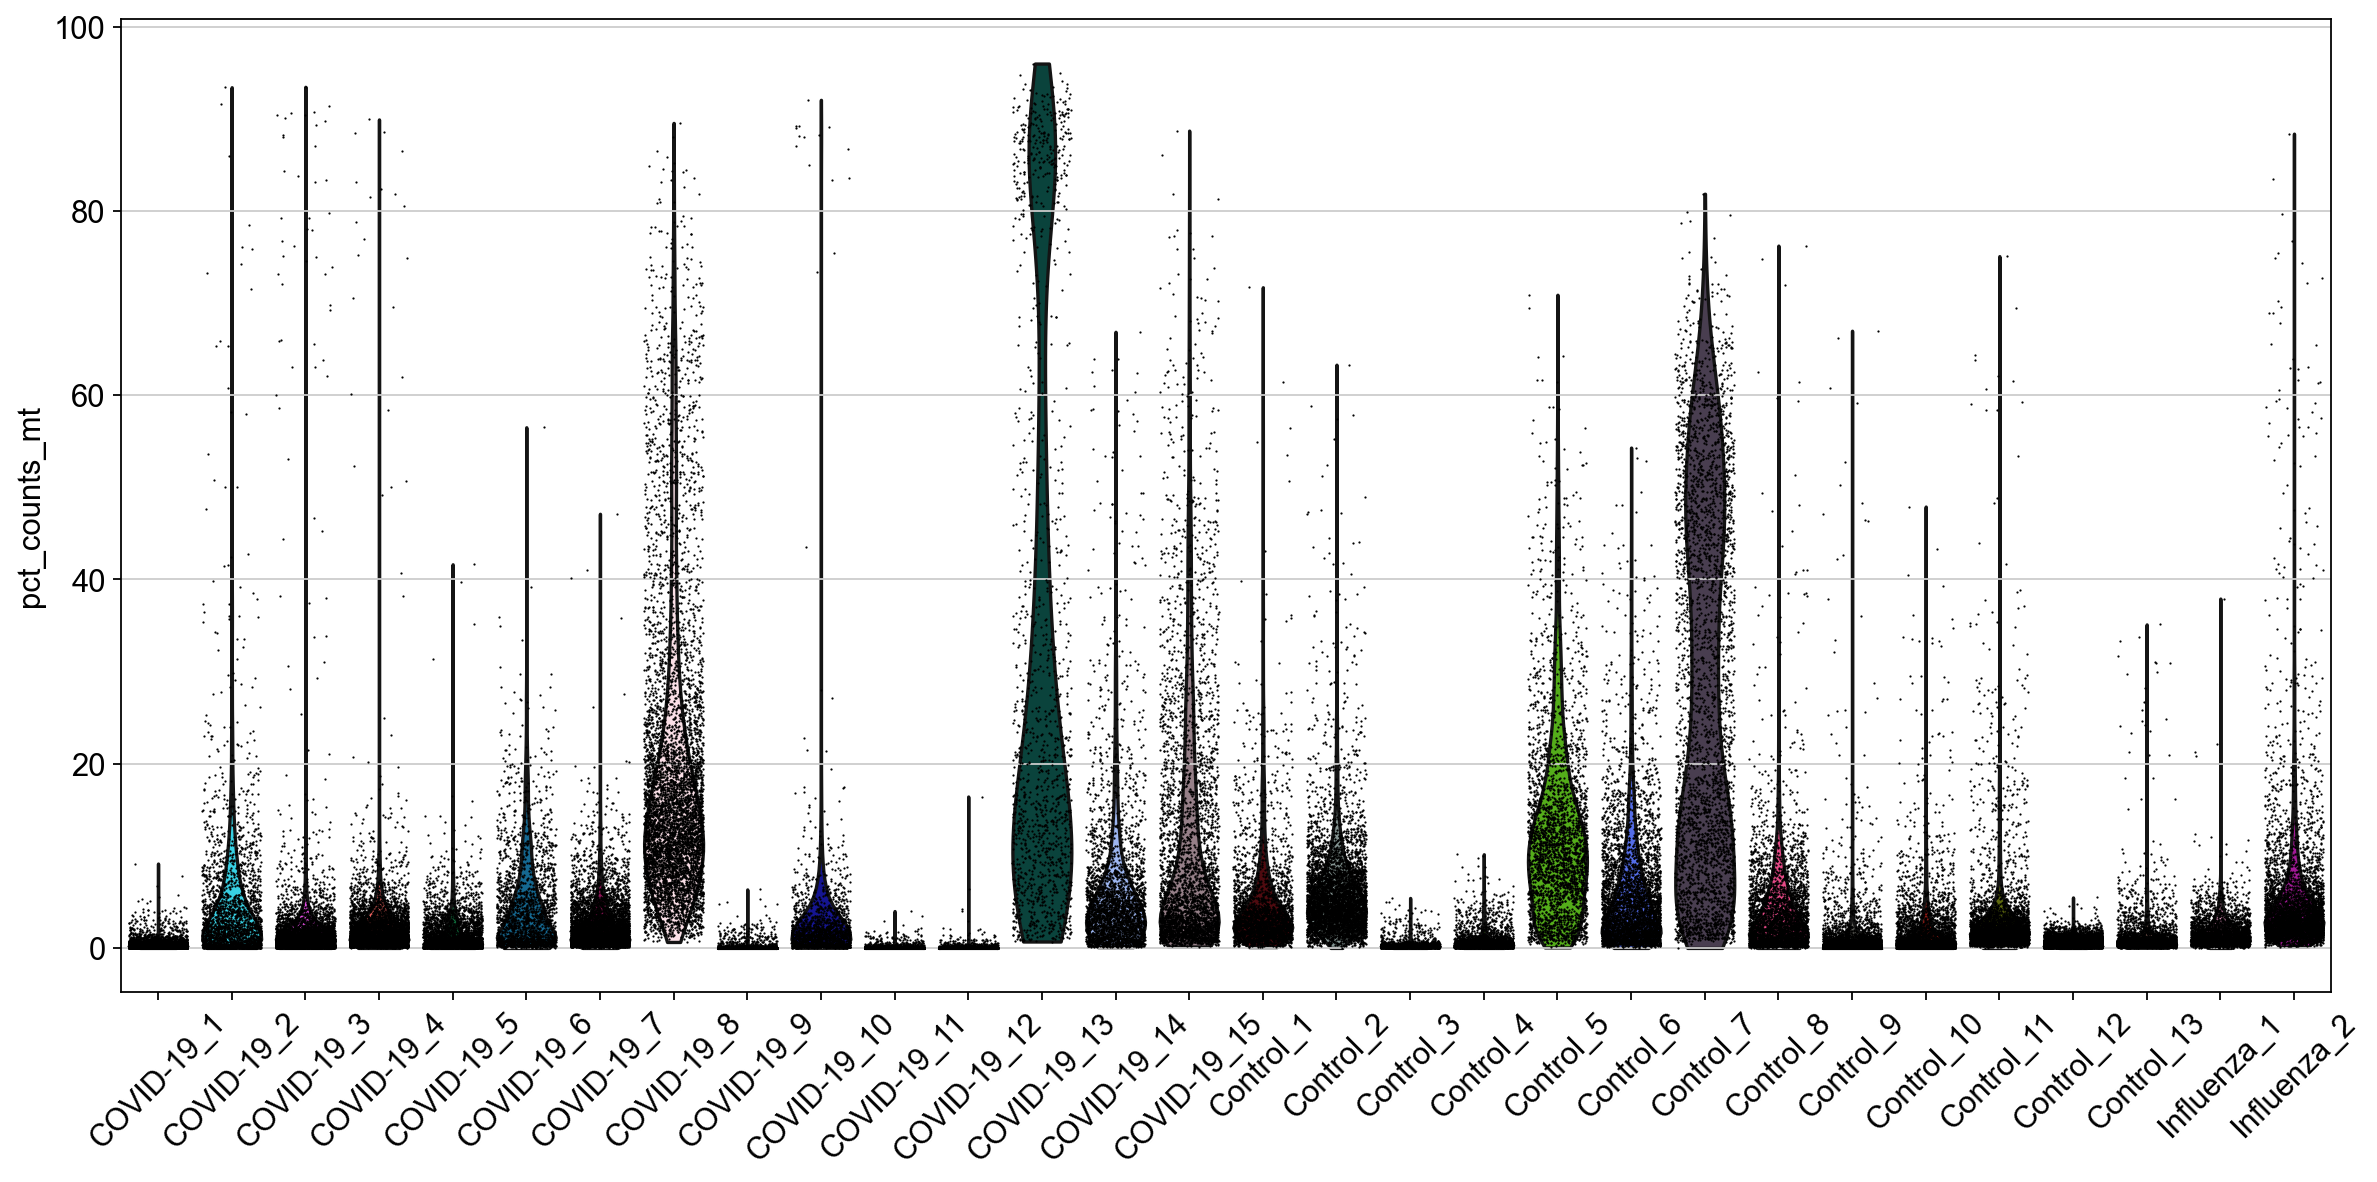

In [16]:
sc.pl.violin(adata, ['pct_counts_mt'],
             jitter=0.4, groupby = 'sample', rotation= 45)

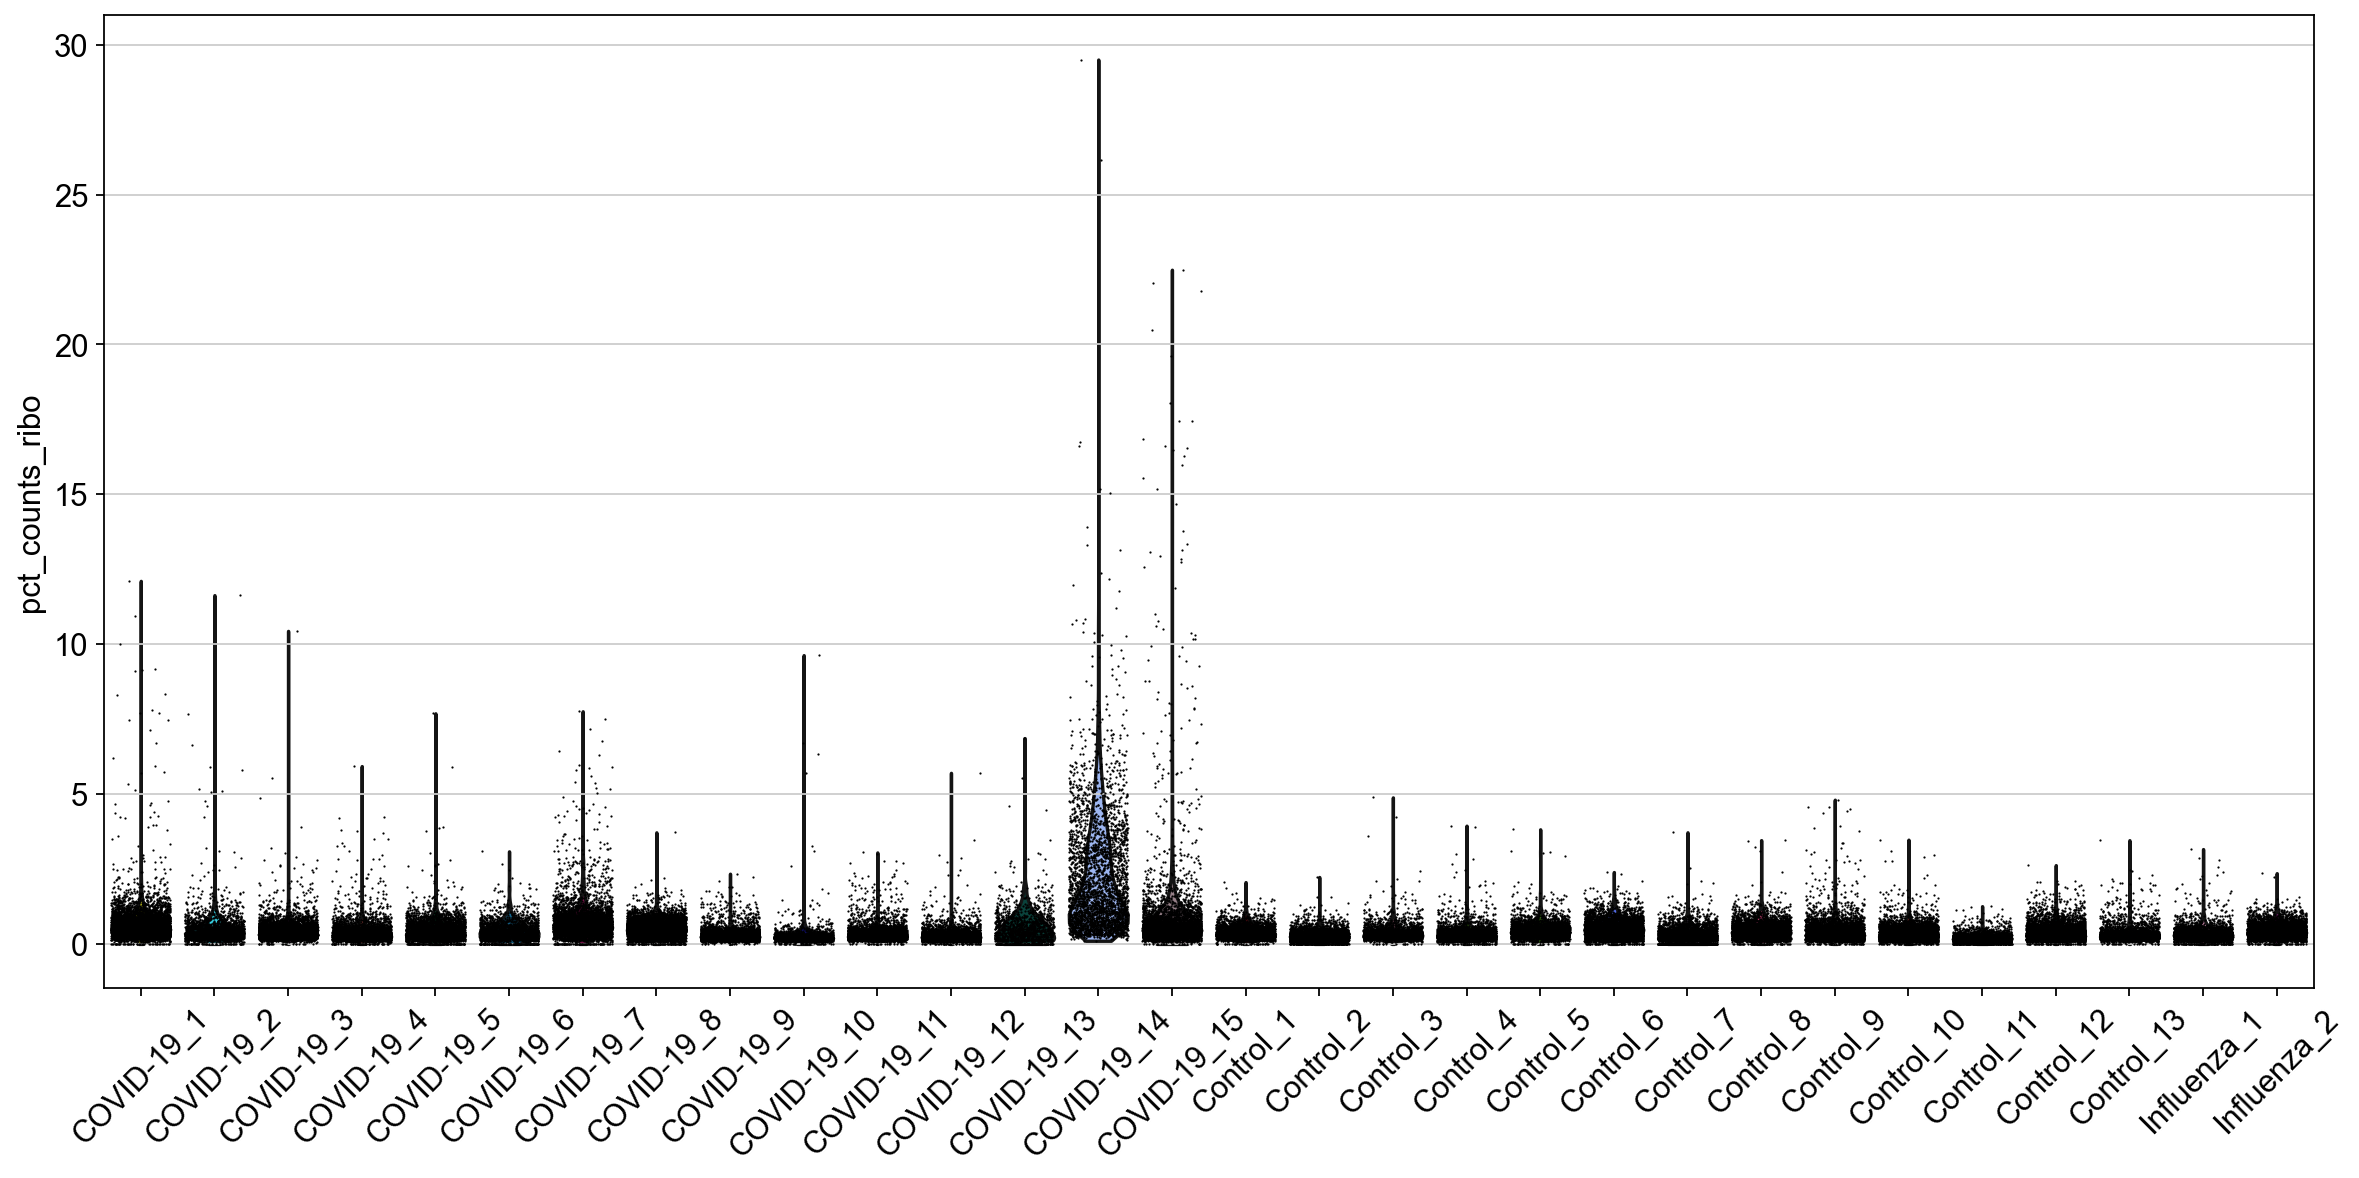

In [17]:
sc.pl.violin(adata, ['pct_counts_ribo'],
             jitter=0.4, groupby = 'sample', rotation= 45)

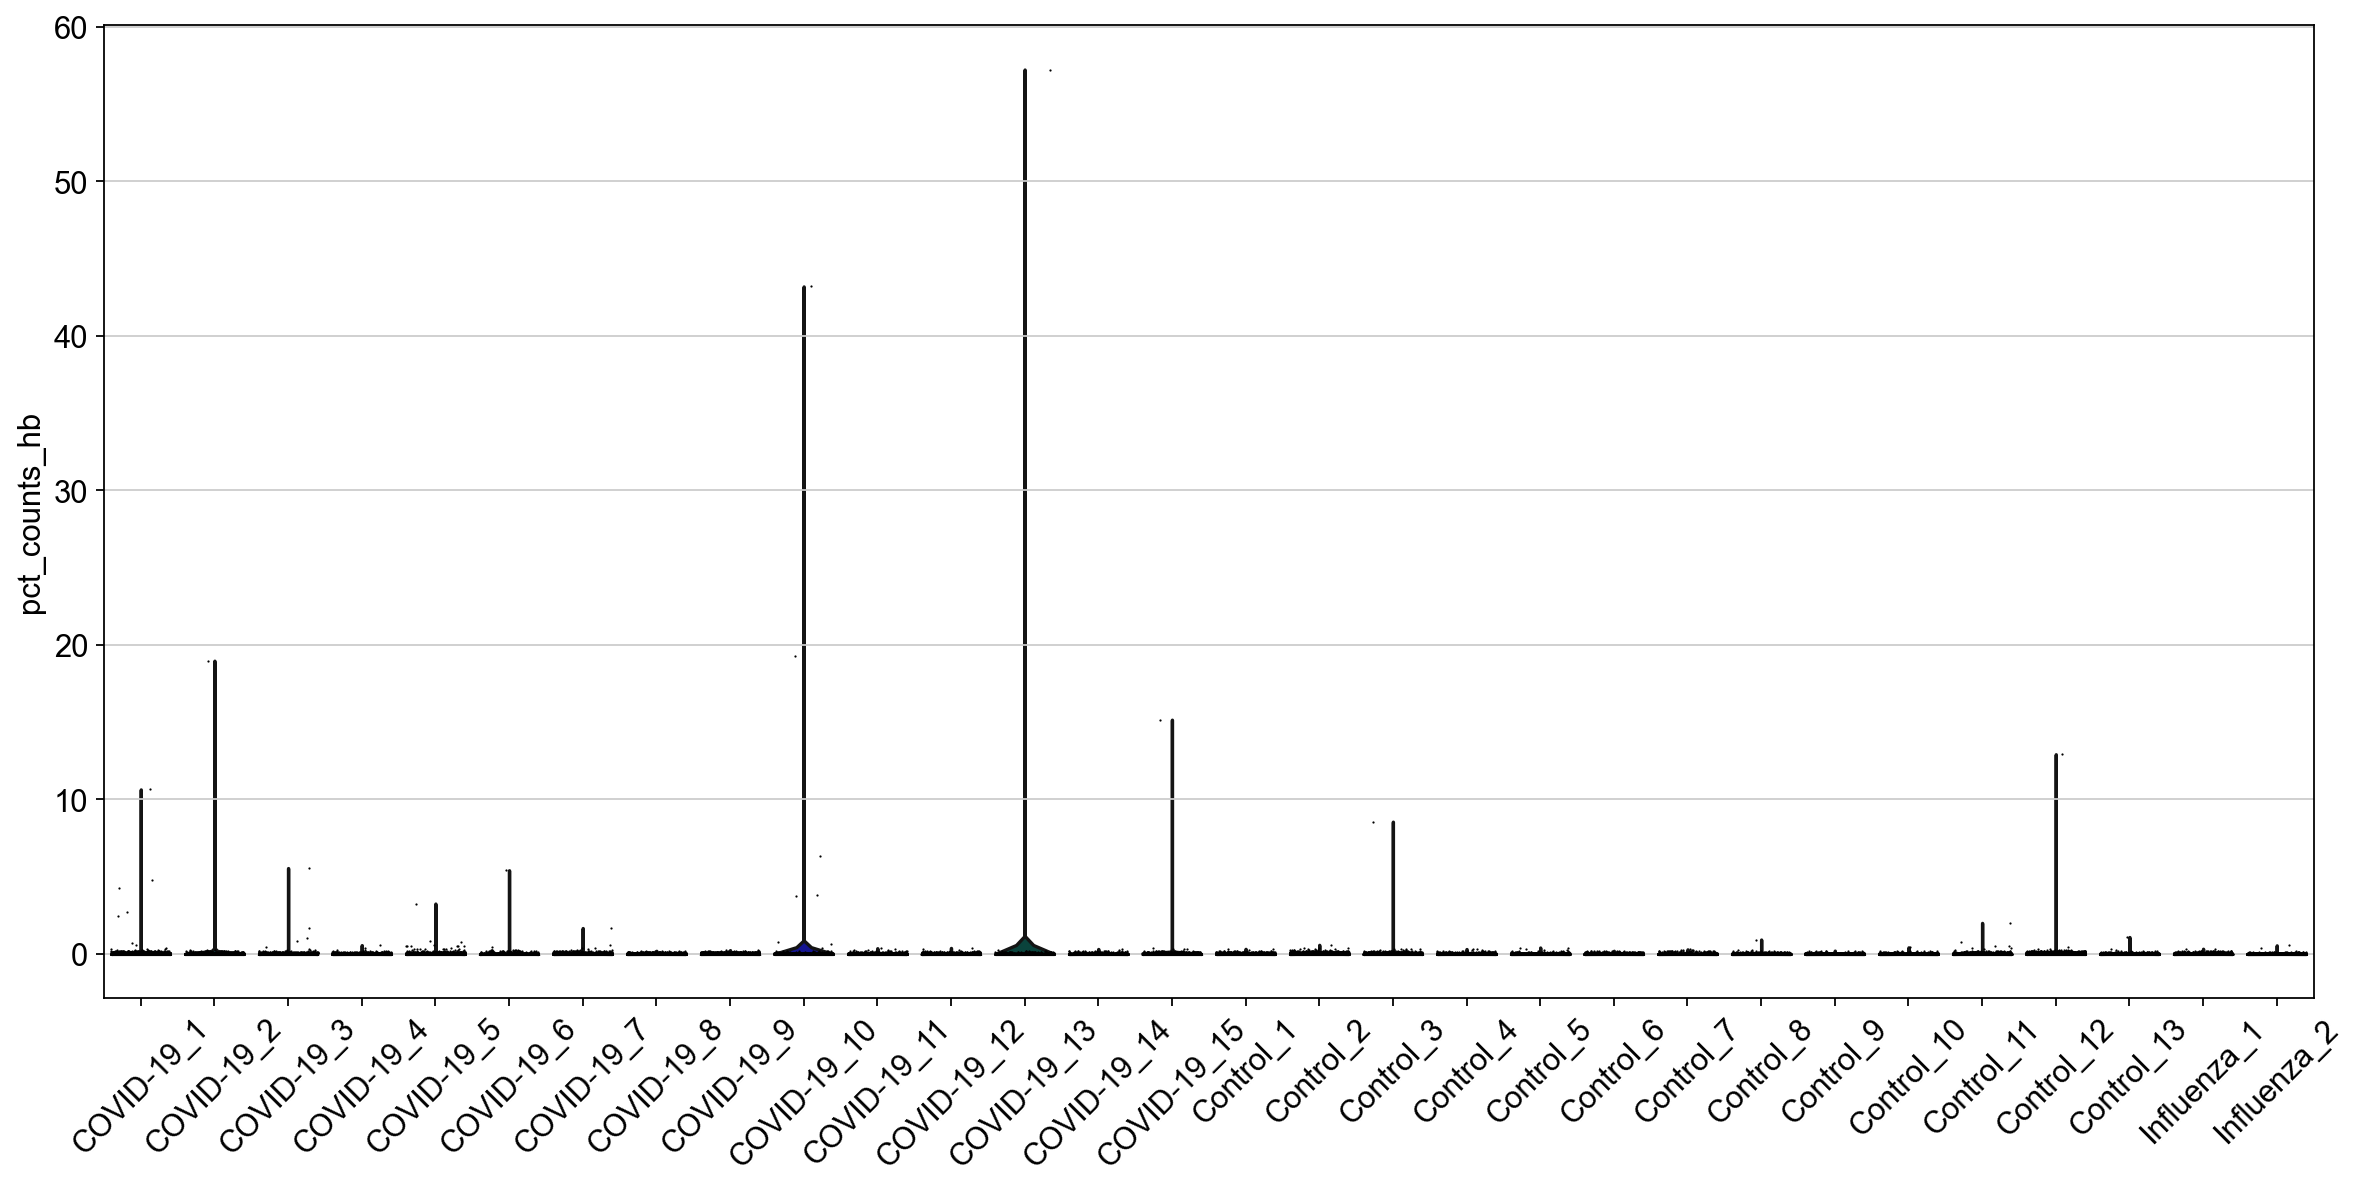

In [18]:
sc.pl.violin(adata, ['pct_counts_hb'],
             jitter=0.4, groupby = 'sample', rotation= 45)

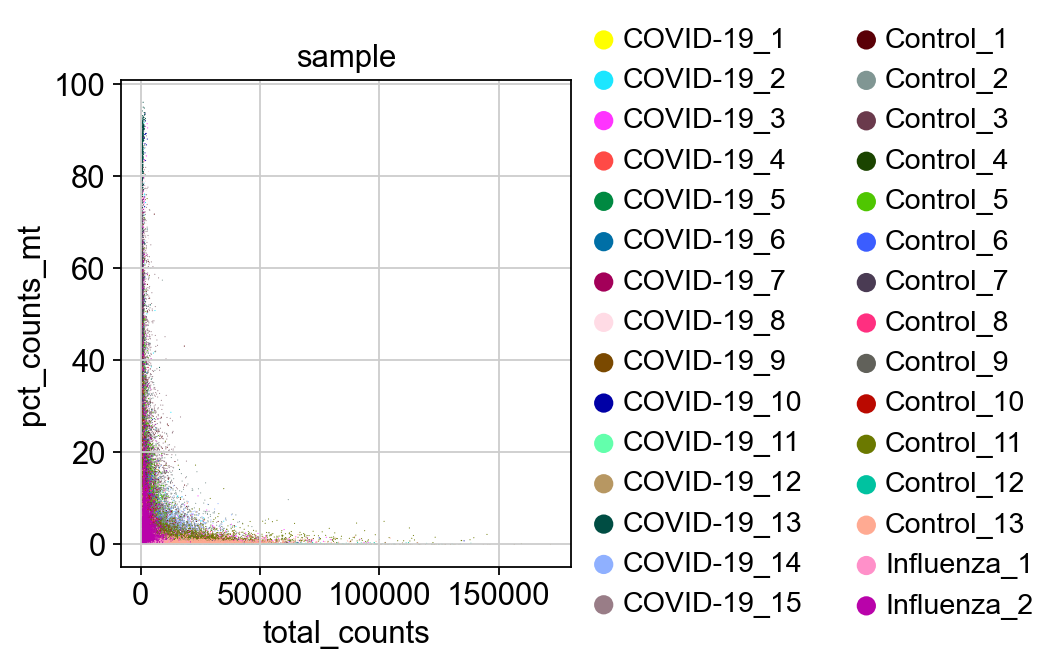

In [19]:
sc.set_figure_params(figsize=None)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt', color="sample")


In [20]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

print(adata.n_obs, adata.n_vars)

filtered out 561 cells that have less than 200 genes expressed
filtered out 4779 genes that are detected in less than 3 cells
121061 31822


normalizing counts per cell
    finished (0:00:11)


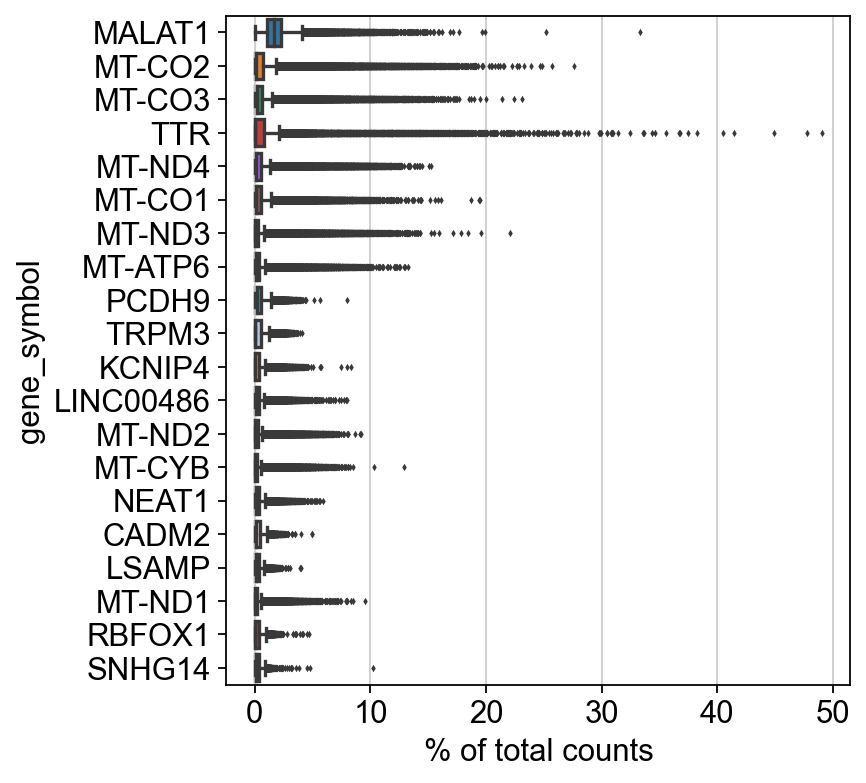

In [21]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [22]:
print(len(adata[adata.obs['pct_counts_mt'] < 20, :]))
print(len(adata[adata.obs['pct_counts_ribo'] > 5, :]))
#114701
#7280

114701
385


In [23]:
# filter for percent mito
adata = adata[adata.obs['pct_counts_mt'] < 20, :]

# Don't filter by the percent of ribosome
# filter for percent ribo > 0.05
#adata = adata[adata.obs['pct_counts_ribo'] > 5, :]

print("Remaining cells %d"%adata.n_obs)

Remaining cells 114701


In [24]:
print(adata.obs['sample'].value_counts())

COVID-19_9     6825
Control_12     6806
COVID-19_1     6685
COVID-19_11    6012
COVID-19_3     5849
COVID-19_7     5019
Control_2      4748
Control_9      4608
COVID-19_4     4561
COVID-19_12    4395
Influenza_2    4278
Control_10     4261
Control_13     4218
COVID-19_8     4161
Control_6      3994
Control_11     3817
COVID-19_5     3767
Control_8      3517
COVID-19_14    2947
COVID-19_15    2926
Influenza_1    2829
Control_4      2817
Control_5      2485
Control_1      2458
COVID-19_2     2359
Control_3      2341
COVID-19_6     2083
COVID-19_10    1766
Control_7      1485
COVID-19_13     684
Name: sample, dtype: int64


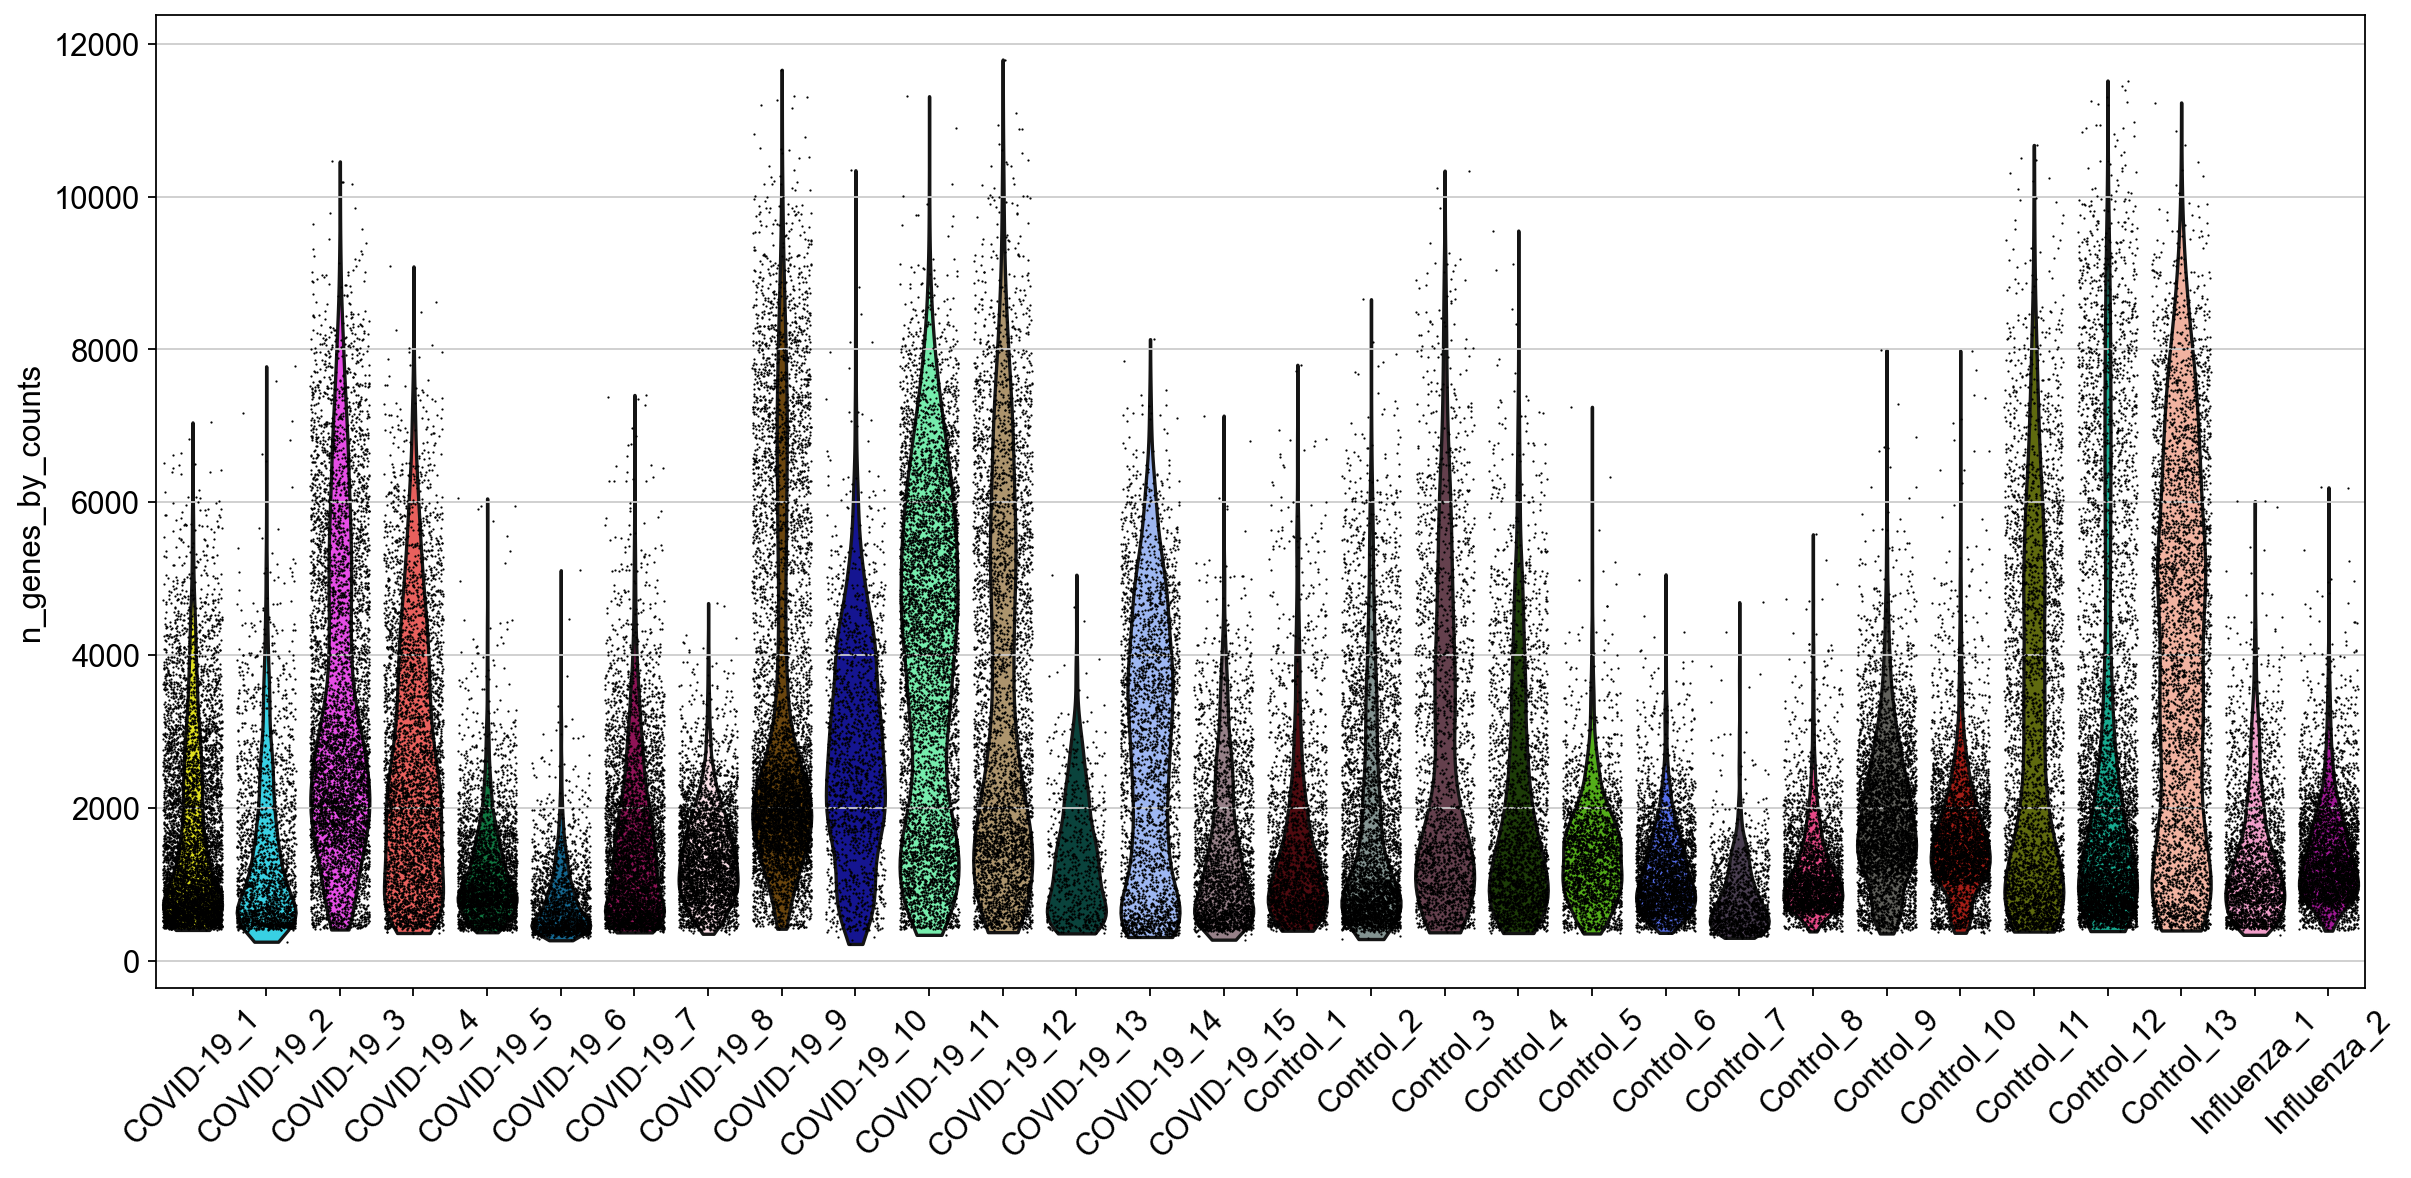

In [25]:
sc.set_figure_params(figsize=(14, 8))
sc.pl.violin(adata, ['n_genes_by_counts'],
             jitter=0.4, groupby = 'sample', rotation= 45)

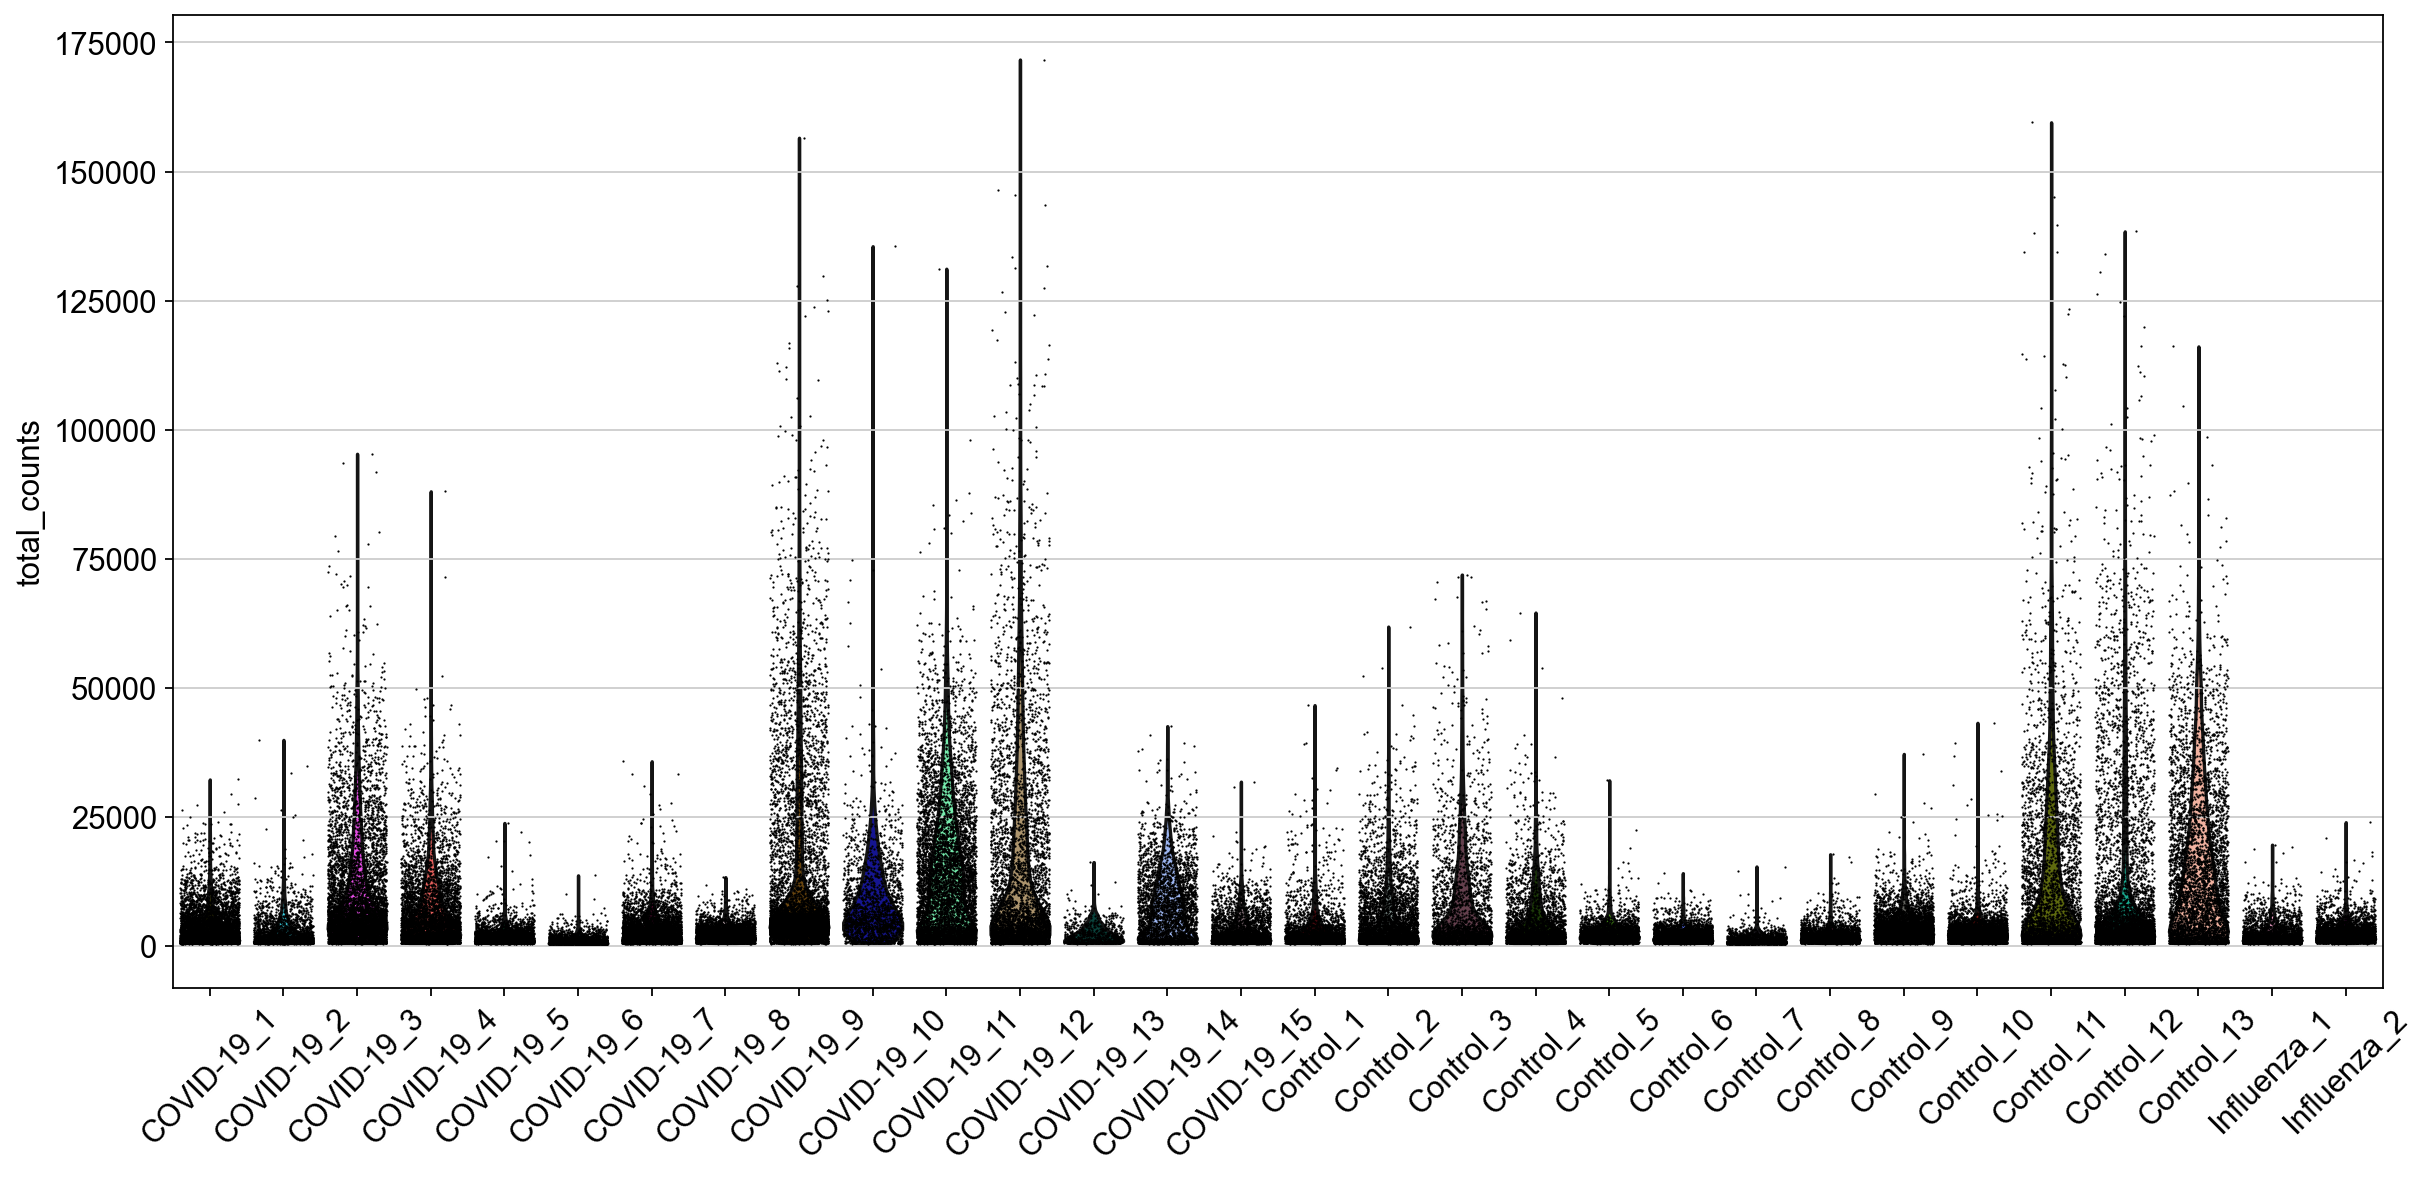

In [26]:
sc.pl.violin(adata, ['total_counts'],
             jitter=0.4, groupby = 'sample', rotation= 45)

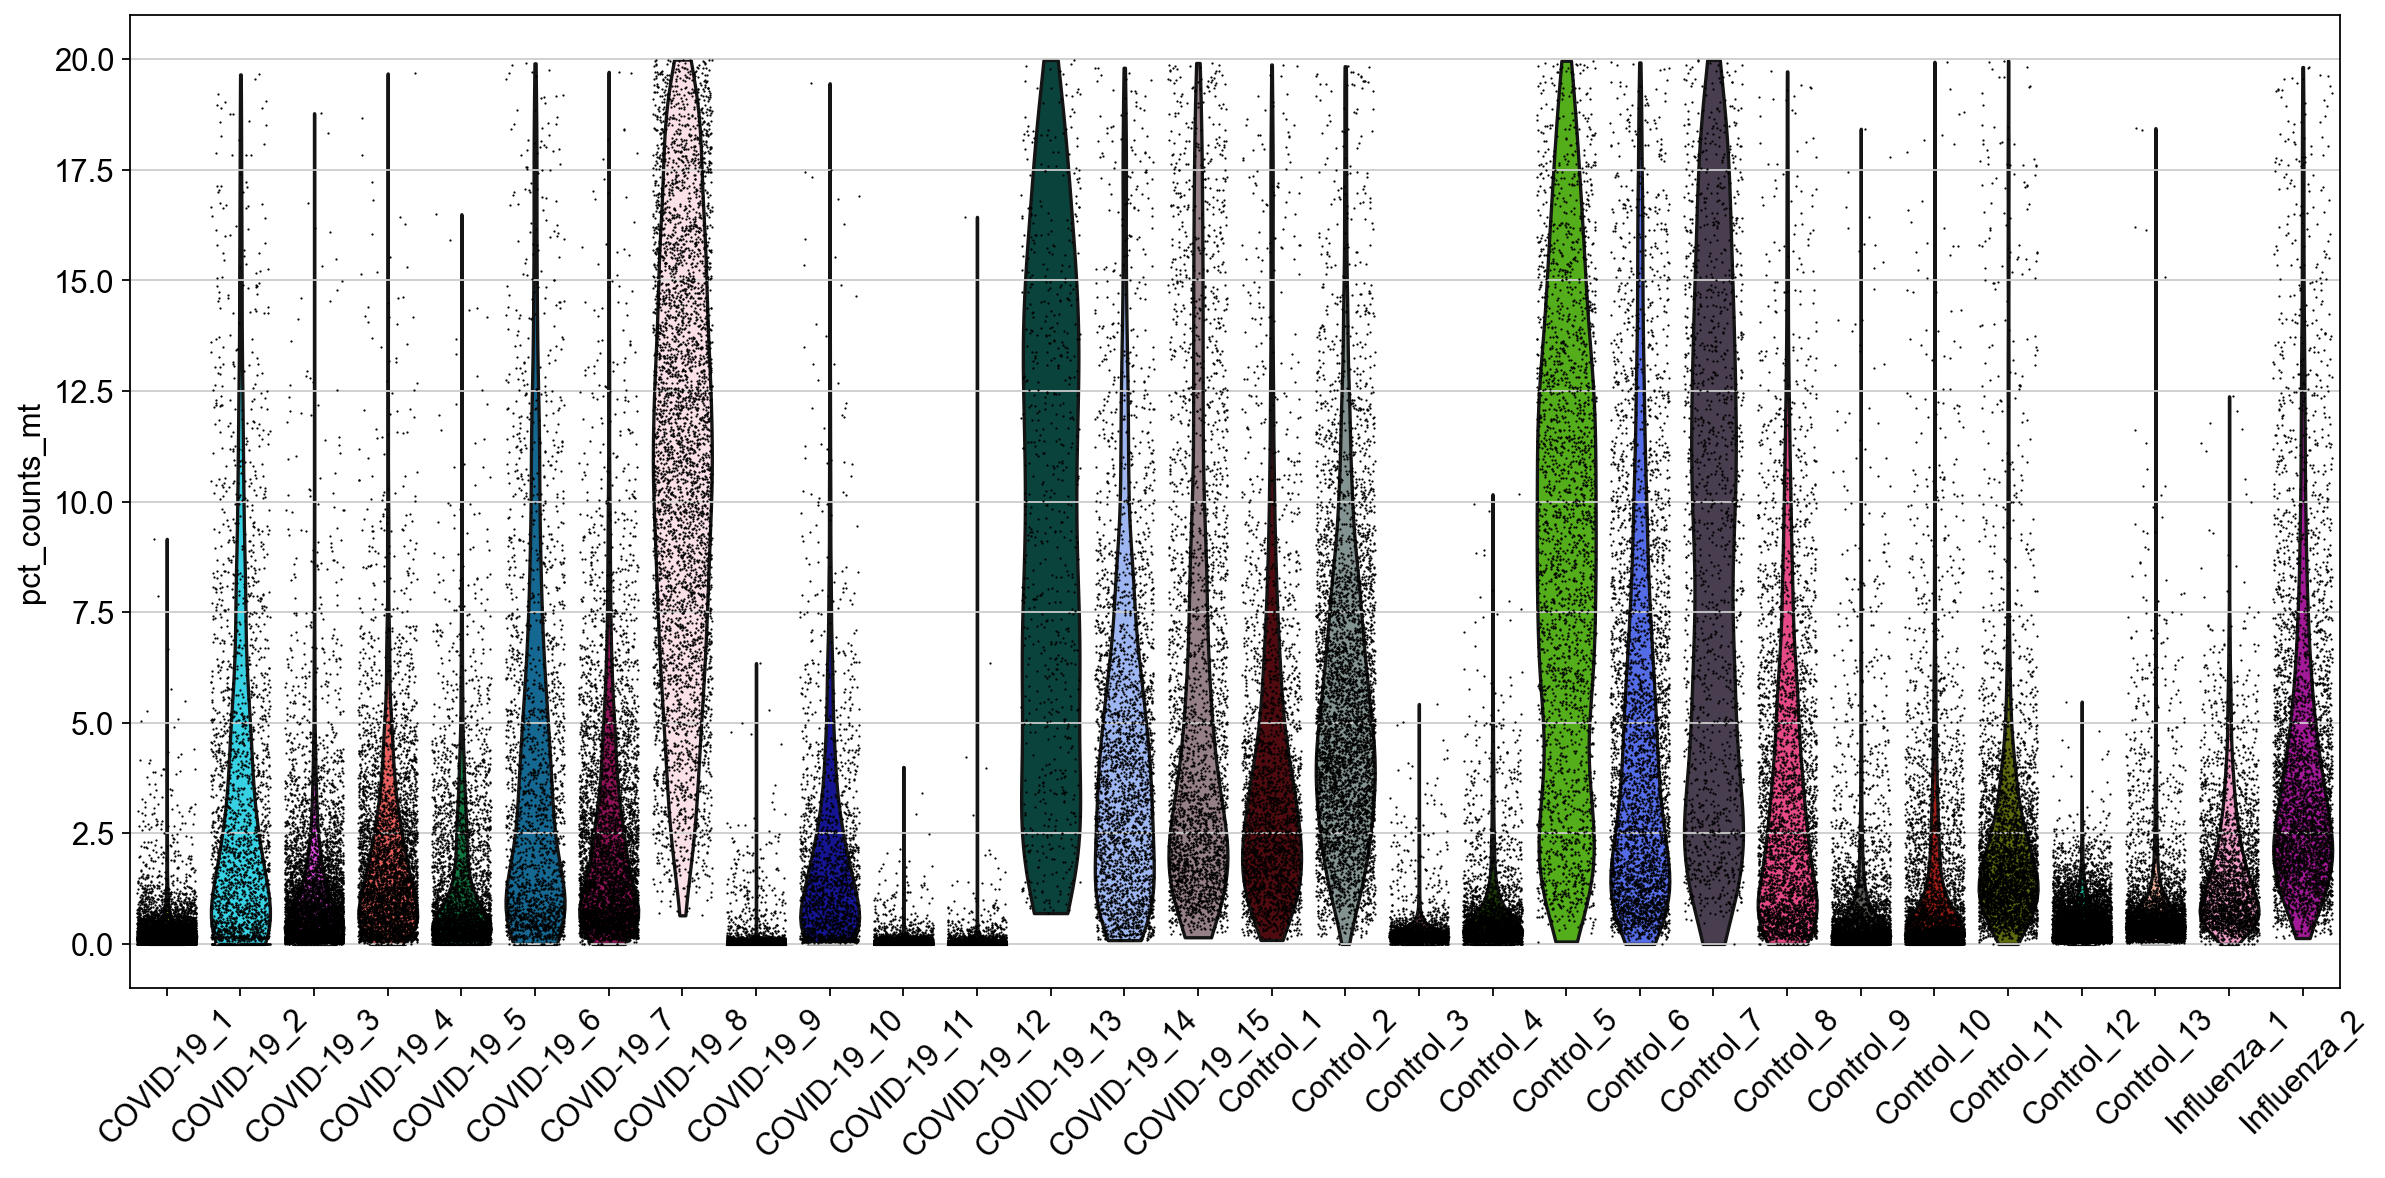

In [27]:
sc.pl.violin(adata, ['pct_counts_mt'],
             jitter=0.4, groupby = 'sample', rotation= 45)

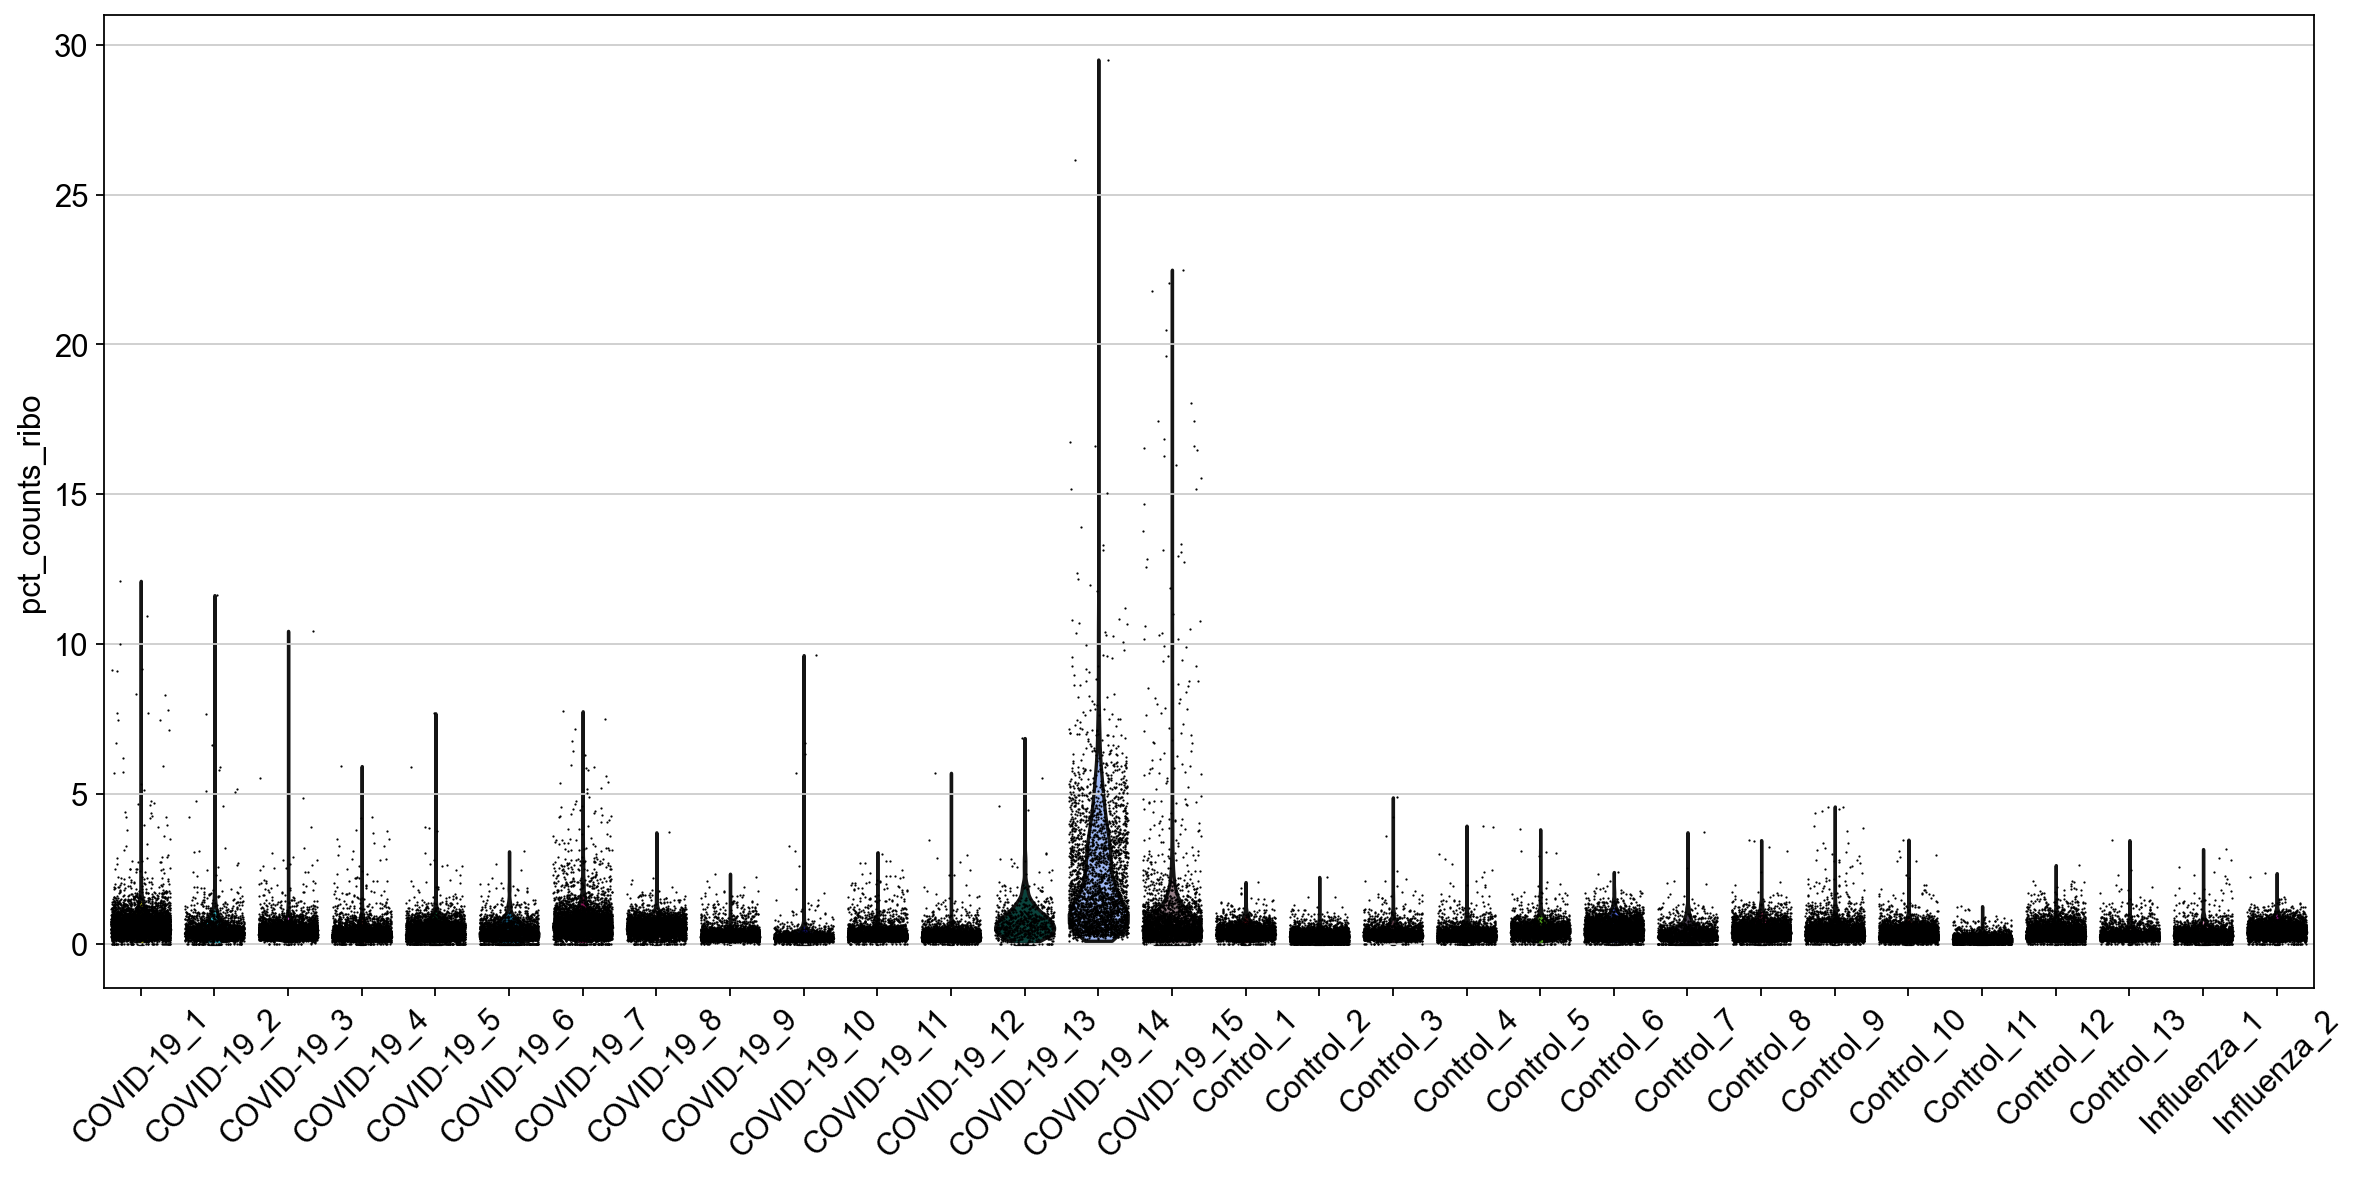

In [28]:
sc.pl.violin(adata, ['pct_counts_ribo'],
             jitter=0.4, groupby = 'sample', rotation= 45)

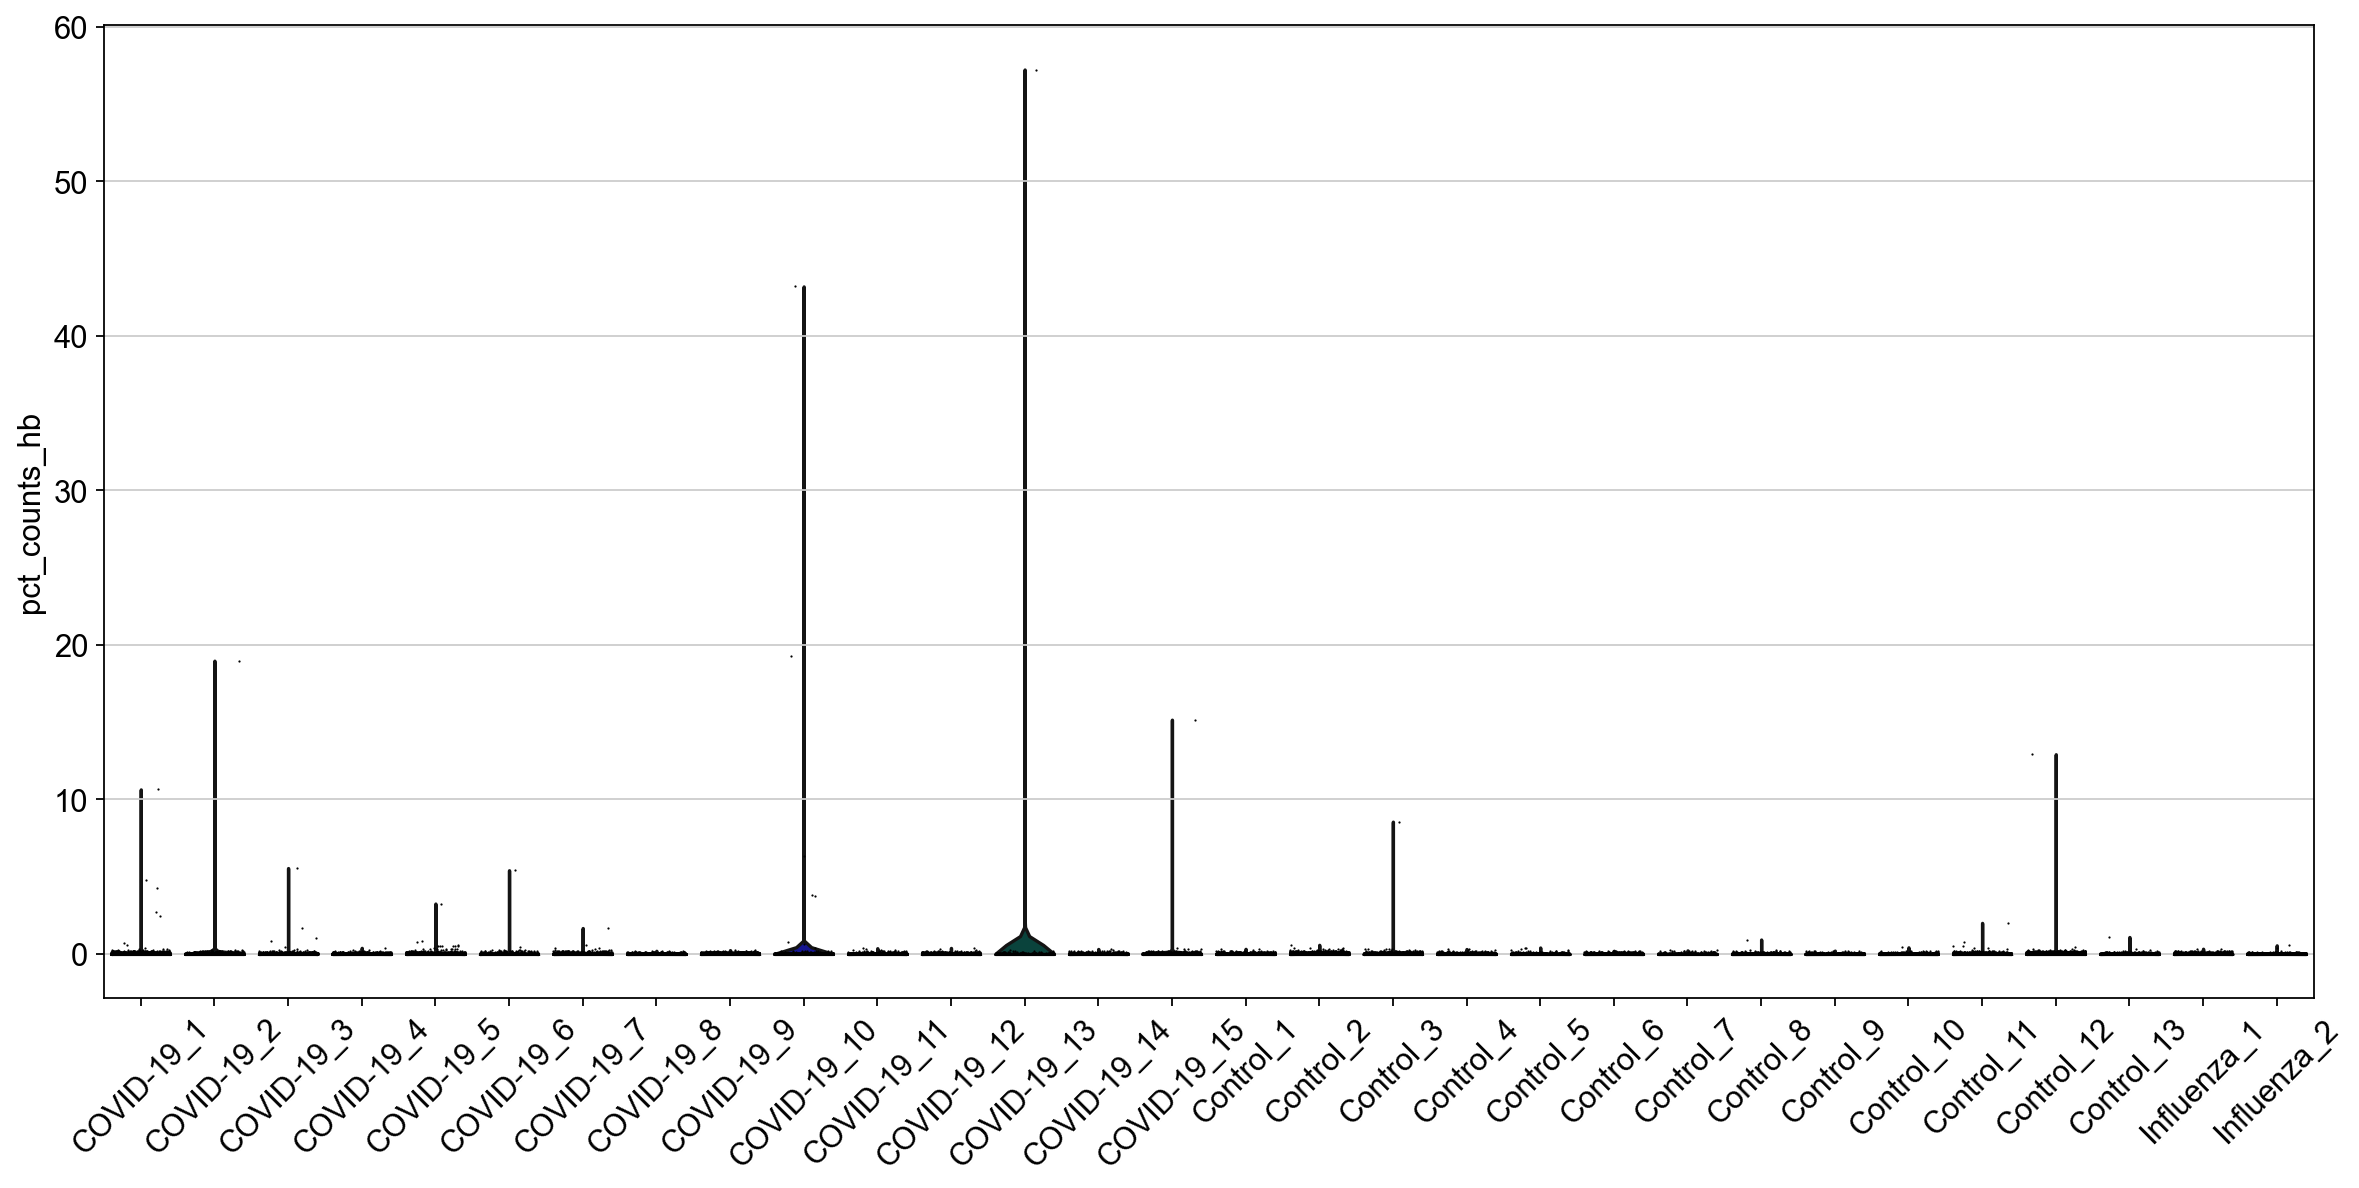

In [29]:
sc.pl.violin(adata, ['pct_counts_hb'],
             jitter=0.4, groupby = 'sample', rotation= 45)

In [30]:
malat1 = adata.var_names.str.startswith('MALAT1')
# we need to redefine the mito_genes since they were first 
# calculated on the full object before removing low expressed genes.
mito_genes = adata.var_names.str.startswith('MT-')
hb_genes = adata.var_names.str.contains('^HB[^(P)]')

remove = np.add(mito_genes, malat1)
remove = np.add(remove, hb_genes)
keep = np.invert(remove)

adata = adata[:,keep]

print(adata.n_obs, adata.n_vars)

114701 31797


In [31]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")
#>>> adata.var[annot.columns] = annot

In [32]:
chrY_genes = adata.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['SRY', 'RPS4Y1', 'ZFY', 'ZFY-AS1', 'LINC00278', 'PCDH11Y', 'LINC00280',
       'TTTY2B', 'AMELY', 'TBL1Y', 'PRKY', 'TTTY18', 'TTTY22', 'USP9Y',
       'DDX3Y', 'UTY', 'TMSB4Y', 'NLGN4Y', 'NLGN4Y-AS1', 'FAM224B', 'FAM224A',
       'TTTY9B', 'HSFY2', 'TTTY14', 'KDM5D', 'TTTY10', 'EIF1AY', 'PRORY',
       'TTTY13', 'PRY2', 'PRY', 'TTTY4', 'DAZ1', 'DAZ2', 'TTTY3B', 'TTTY4B',
       'DAZ4', 'TTTY4C', 'TTTY17C'],
      dtype='object')

In [33]:
adata.obs['percent_chrY'] = (np.sum(
    adata[:, chrY_genes].X, axis=1) / np.sum(adata.X, axis=1) * 100).toarray()

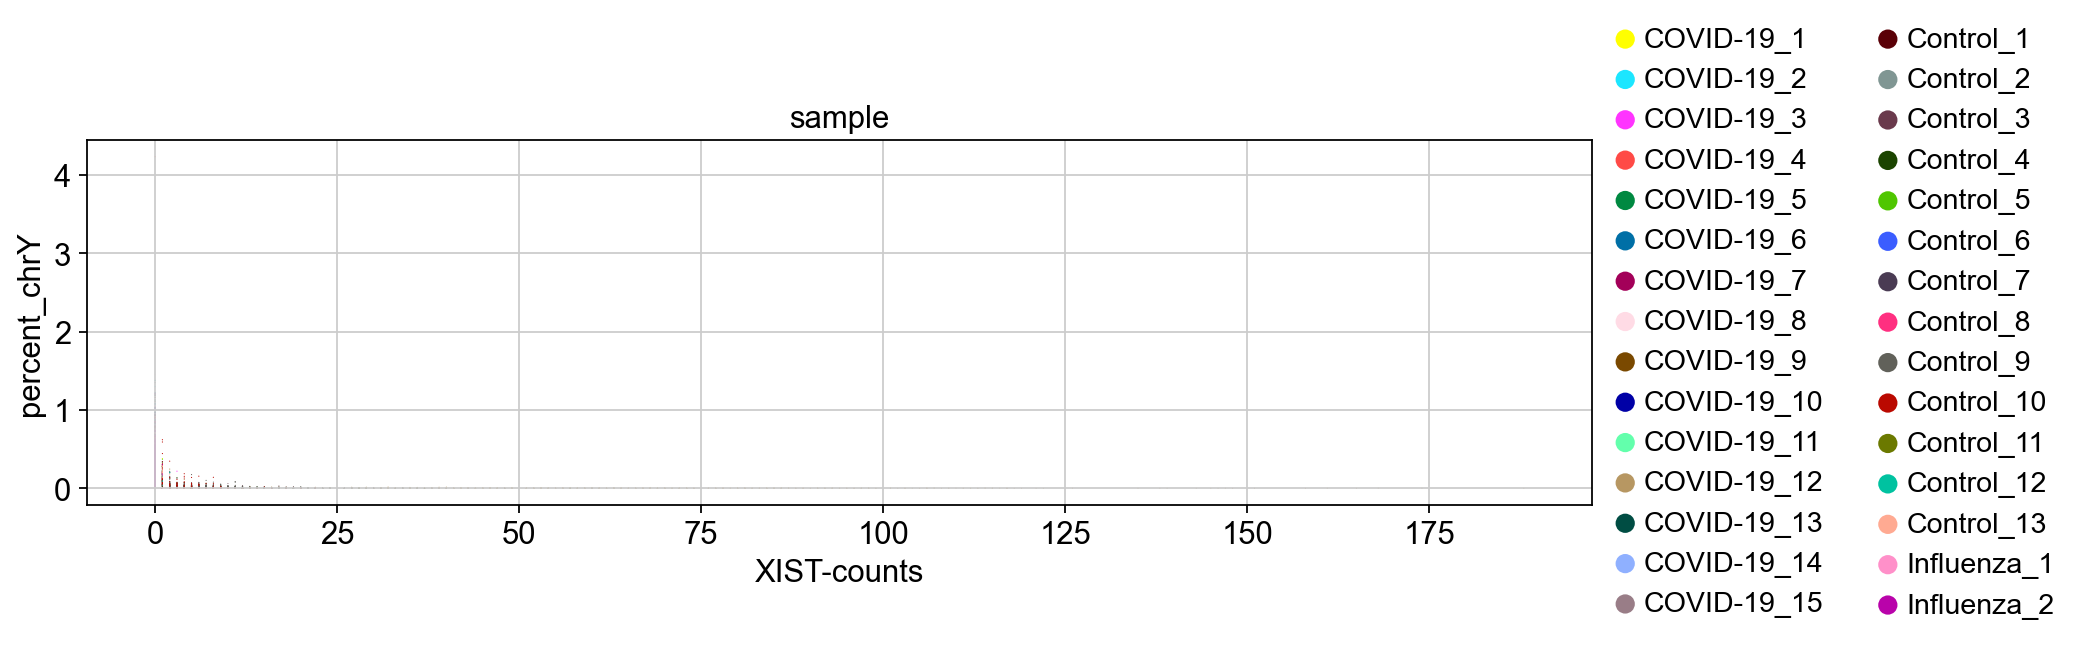

In [34]:
# color inputs must be from either .obs or .var, so add in XIST expression to obs.
adata.obs["XIST-counts"] = adata.X[:,adata.var_names.str.match('XIST')] # XIST is a gene!

sc.set_figure_params(figsize=(10, 3))
sc.pl.scatter(adata, x='XIST-counts', y='percent_chrY', color="sample")


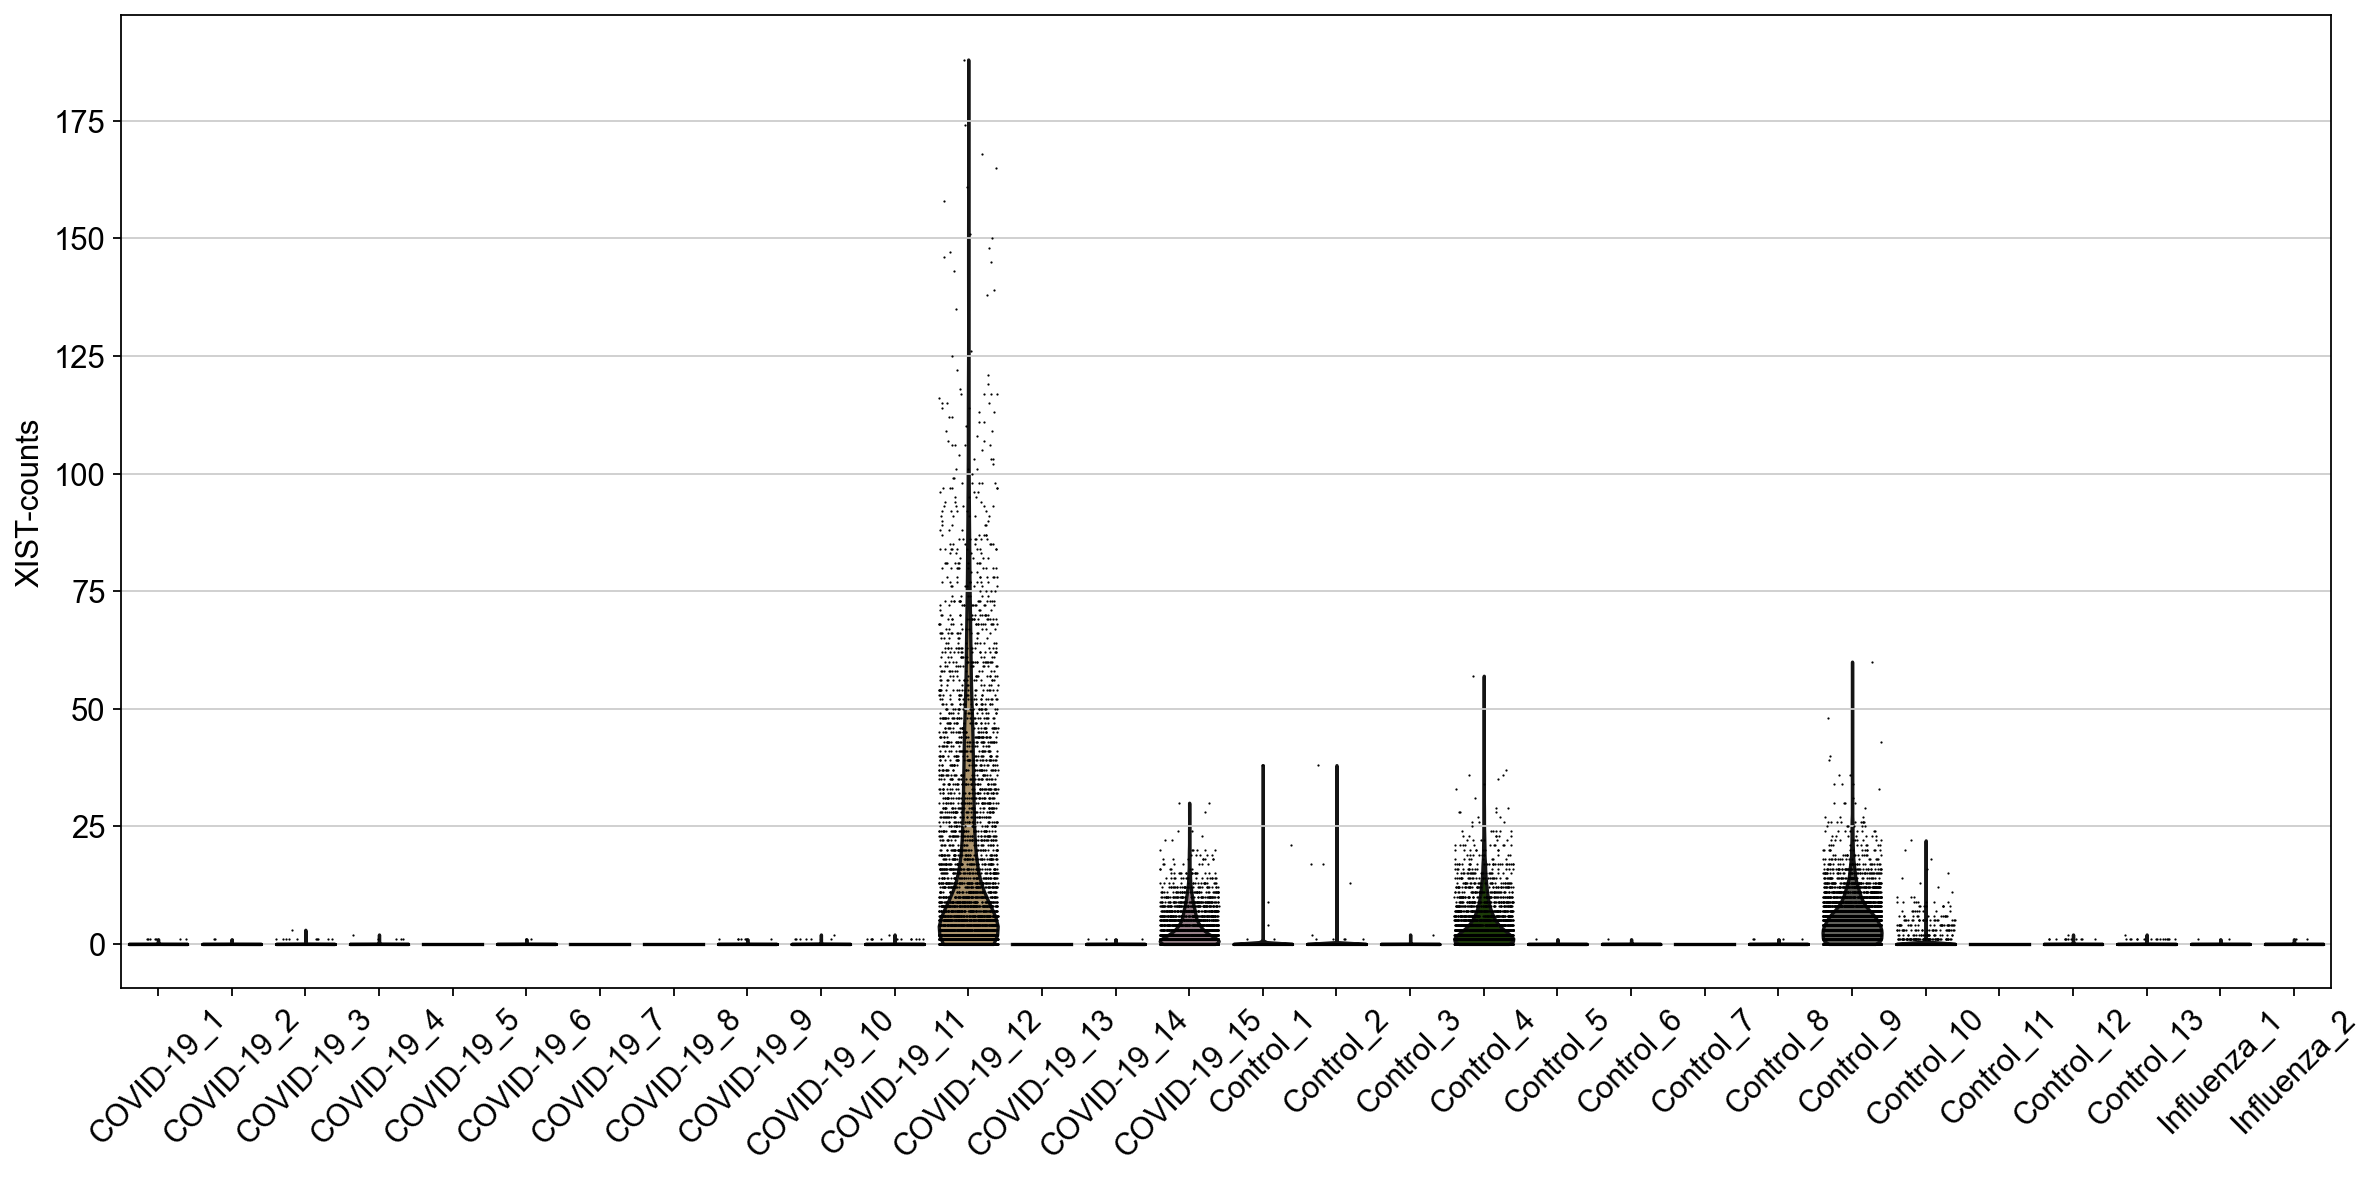

In [35]:
sc.set_figure_params(figsize=(14, 8))
sc.pl.violin(adata, ["XIST-counts"], jitter=0.4, groupby = 'sample', rotation= 45)

Based on the above plot, there are only 4 females. COVID_19_12, COVID_19_15, Control_4, and Control_9 are female.

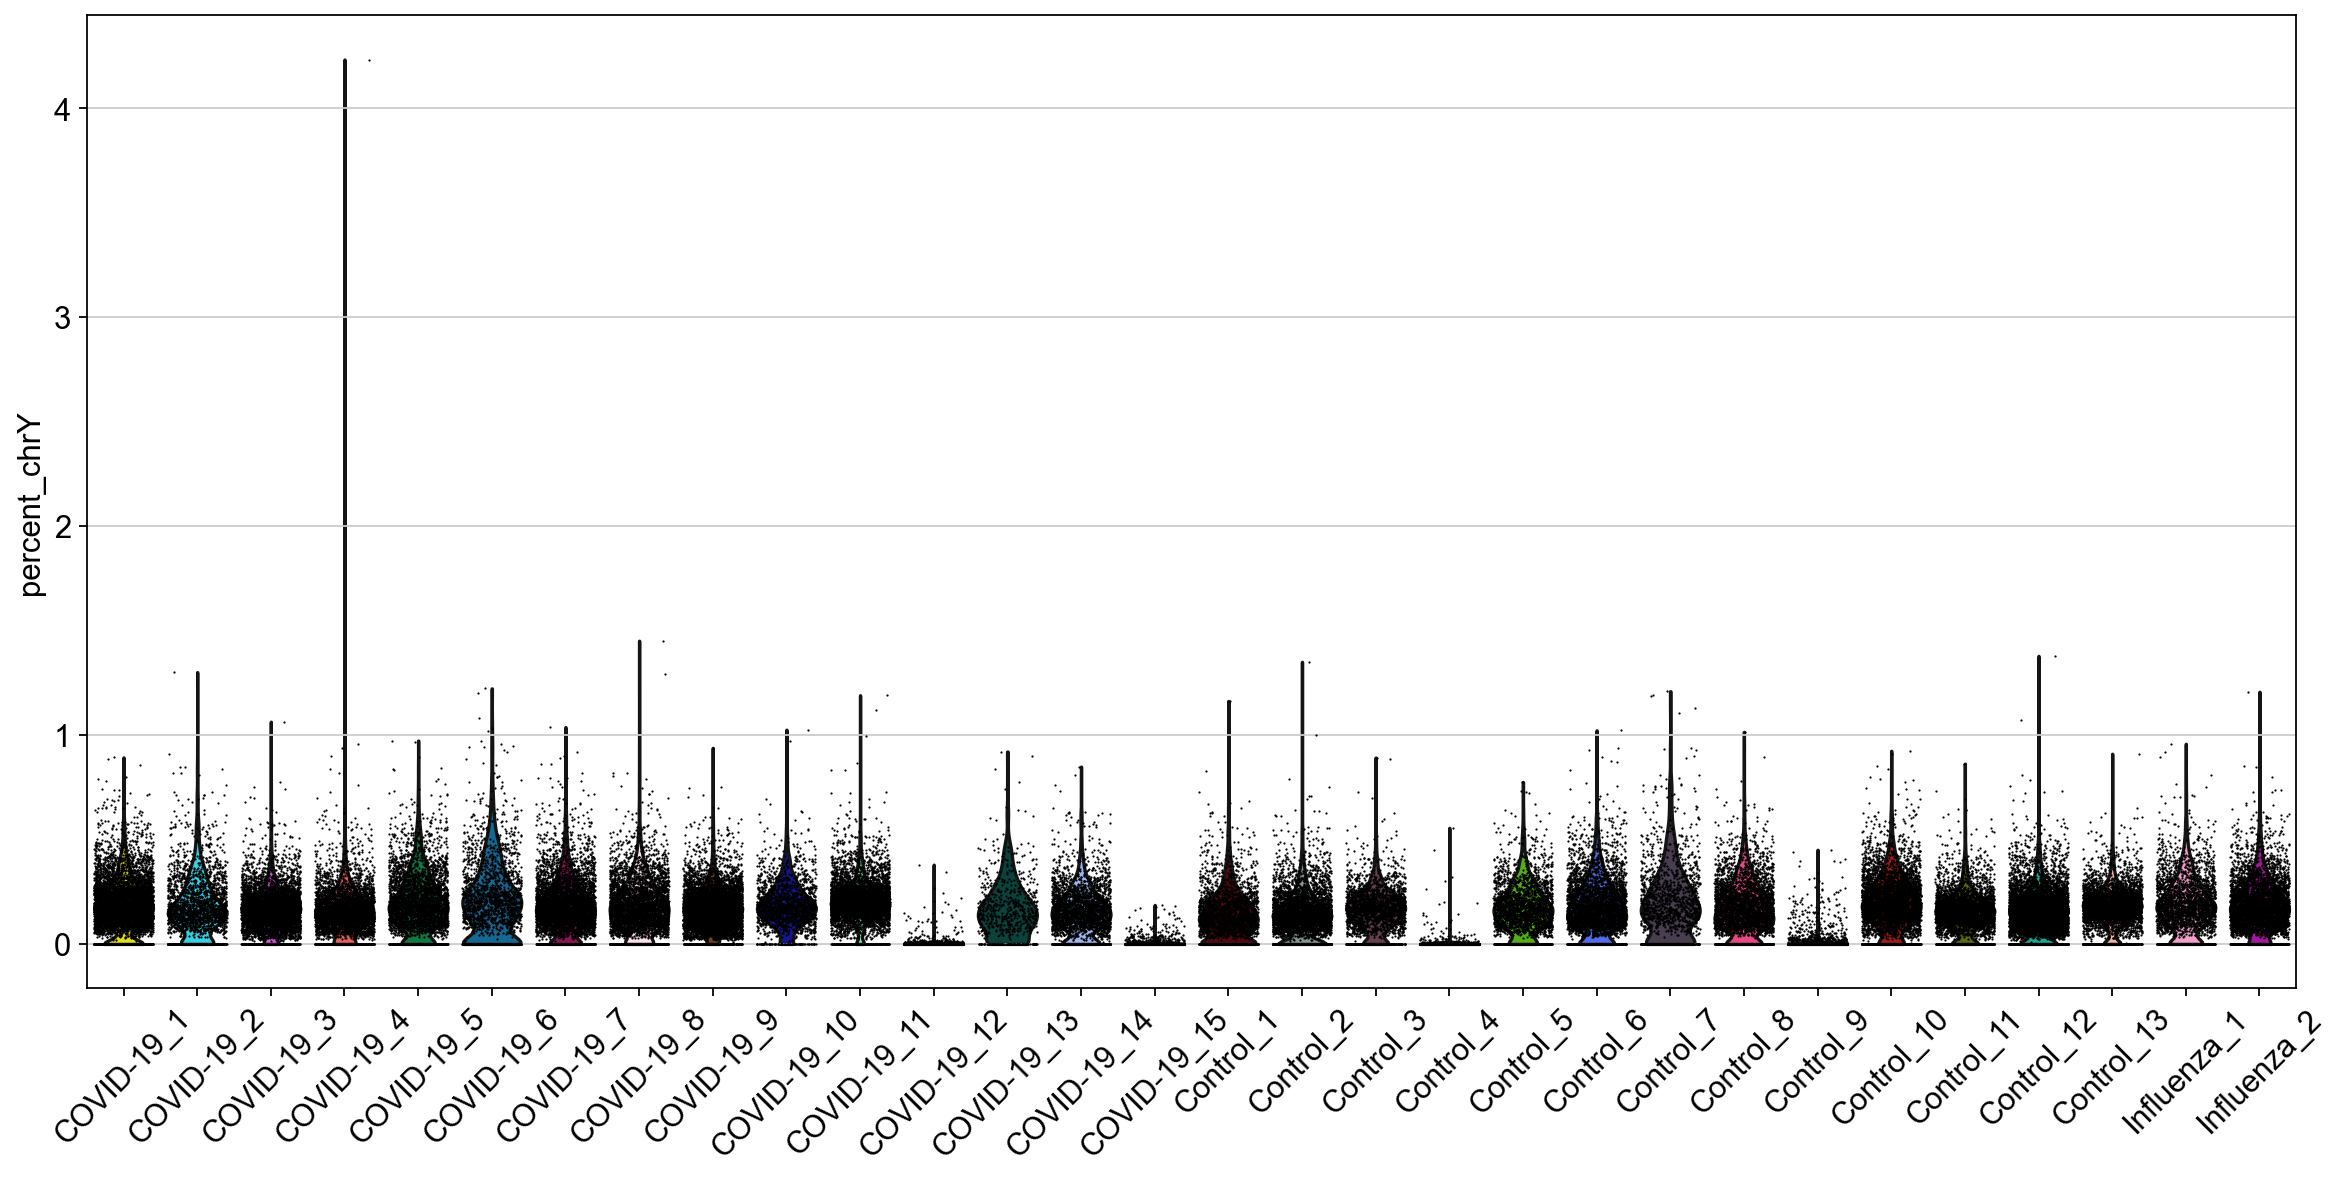

In [36]:
sc.pl.violin(adata, ["percent_chrY"], jitter=0.4, groupby = 'sample', rotation= 45)

Based on the above plot, most of samples are male (expect for COVID_19_12, COVID_19_15, Control_4, and Control_9).

In [3]:
cell_cycle_genes = [x.strip() for x in open('./data/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]
print(len(cell_cycle_genes))

97


NameError: name 'adata' is not defined

In [38]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    730 total control genes are used. (0:04:06)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    858 total control genes are used. (0:04:46)
-->     'phase', cell cycle phase (adata.obs)


In [39]:
adata.obs

sample  batch  n_genes_by_counts  total_counts  \
AAACCCAAGGCTTTCA   COVID-19_1      0               2089        3665.0   
AAACCCACAGGTATGG   COVID-19_1      0               1716        3132.0   
AAACCCATCGAGTACT   COVID-19_1      0               4228        9130.0   
AAACCCATCGTGGTAT   COVID-19_1      0                479         563.0   
AAACGAAAGAAGAACG   COVID-19_1      0               2468        4163.0   
...                       ...    ...                ...           ...   
TTTGGTTCACAACGCC  COVID-19_15     29               3667        8992.0   
TTTGGTTGTACAAGCG  COVID-19_15     29                602         856.0   
TTTGTTGAGCCGTAAG  COVID-19_15     29                958        1469.0   
TTTGTTGCAAGCGGAT  COVID-19_15     29               2297        5004.0   
TTTGTTGGTATACAGA  COVID-19_15     29                534         790.0   

                  total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCAAGGCTTTCA              1.0       0.027285               11.0   
AAACCCACAGGTATGG              1.0       0.031928                8.0   
AAACCCATCGAGTACT             37.0       0.405257               34.0   
AAACCCATCGTGGTAT              0.0       0.000000                4.0   
AAACGAAAGAAGAACG              8.0       0.192169               35.0   
...                           ...            ...                ...   
TTTGGTTCACAACGCC            181.0       2.012900               86.0   
TTTGGTTGTACAAGCG             51.0       5.957944                6.0   
TTTGTTGAGCCGTAAG            131.0       8.917631                4.0   
TTTGTTGCAAGCGGAT            800.0      15.987210               35.0   
TTTGTTGGTATACAGA            120.0      15.189873               62.0   

                  pct_counts_ribo  total_counts_hb  pct_counts_hb  \
AAACCCAAGGCTTTCA         0.300136              0.0       0.000000   
AAACCCACAGGTATGG         0.255428              0.0       0.000000   
AAACCCATCGAGTACT         0.372399              2.0       0.021906   
AAACCCATCGTGGTAT         0.710480              0.0       0.000000   
AAACGAAAGAAGAACG         0.840740              0.0       0.000000   
...                           ...              ...            ...   
TTTGGTTCACAACGCC         0.956406              2.0       0.022242   
TTTGGTTGTACAAGCG         0.700935              0.0       0.000000   
TTTGTTGAGCCGTAAG         0.272294              1.0       0.068074   
TTTGTTGCAAGCGGAT         0.699440              0.0       0.000000   
TTTGTTGGTATACAGA         7.848101              0.0       0.000000   

                  percent_mt2  n_counts  n_genes  percent_chrY  XIST-counts  \
AAACCCAAGGCTTTCA          NaN    3665.0     2089      0.111019          0.0   
AAACCCACAGGTATGG          NaN    3132.0     1716      0.449583          0.0   
AAACCCATCGAGTACT          NaN    9130.0     4228      0.146232          0.0   
AAACCCATCGTGGTAT          NaN     563.0      479      0.181818          0.0   
AAACGAAAGAAGAACG          NaN    4163.0     2468      0.049152          0.0   
...                       ...       ...      ...           ...          ...   
TTTGGTTCACAACGCC          NaN    8992.0     3667      0.000000         12.0   
TTTGGTTGTACAAGCG          NaN     856.0      602      0.000000          2.0   
TTTGTTGAGCCGTAAG          NaN    1469.0      958      0.000000          3.0   
TTTGTTGCAAGCGGAT          NaN    5004.0     2297      0.000000          2.0   
TTTGTTGGTATACAGA          NaN     790.0      534      0.000000          0.0   

                   S_score  G2M_score phase  
AAACCCAAGGCTTTCA -0.041944   0.004079   G2M  
AAACCCACAGGTATGG -0.028245  -0.055944    G1  
AAACCCATCGAGTACT -0.011416  -0.092075    G1  
AAACCCATCGTGGTAT -0.021918  -0.012821    G1  
AAACGAAAGAAGAACG  0.003457  -0.023310     S  
...                    ...        ...   ...  
TTTGGTTCACAACGCC -0.095173  -0.006410    G1  
TTTGGTTGTACAAGCG -0.017808   0.011072   G2M  
TTTGTTGAGCCGTAAG -0.031507  -0.017483    G1  
TTTGTTGCAAGCGGAT -0.035943  -0.051865    G1  
TTTGTTGGT

In [40]:
# save normalized counts in raw slot.
adata.raw = adata

# # normalize to depth 10 000
# sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.normalize_total(adata)

# logaritmize
sc.pp.log1p(adata)

# scale
sc.pp.scale(adata)

normalizing counts per cell
    finished (0:00:04)


In [41]:
# # Save adata
# save_file = './data/h5ab_folder/gse159812_raw_covid_normalized.h5ad'
# adata.write_h5ad(save_file)

In [4]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy


sc.settings.verbosity = 3         # verbosity: errors (0), warnings (1), info (2), hints (3)
# gives error!! sc.logging.print_versions()

import warnings
warnings.filterwarnings('ignore')

sc.settings.set_figure_params(dpi=80)

adata = sc.read_h5ad('./data/h5ab_folder/gse159812_raw_covid_normalized.h5ad')

cell_cycle_genes = [x.strip() for x in open('./data/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]


97


In [5]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    730 total control genes are used. (0:05:49)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    858 total control genes are used. (0:07:07)
-->     'phase', cell cycle phase (adata.obs)


In [6]:
adata.obs

sample  batch  n_genes_by_counts  total_counts  \
AAACCCAAGGCTTTCA   COVID-19_1      0               2089        3665.0   
AAACCCACAGGTATGG   COVID-19_1      0               1716        3132.0   
AAACCCATCGAGTACT   COVID-19_1      0               4228        9130.0   
AAACCCATCGTGGTAT   COVID-19_1      0                479         563.0   
AAACGAAAGAAGAACG   COVID-19_1      0               2468        4163.0   
...                       ...    ...                ...           ...   
TTTGGTTCACAACGCC  COVID-19_15     29               3667        8992.0   
TTTGGTTGTACAAGCG  COVID-19_15     29                602         856.0   
TTTGTTGAGCCGTAAG  COVID-19_15     29                958        1469.0   
TTTGTTGCAAGCGGAT  COVID-19_15     29               2297        5004.0   
TTTGTTGGTATACAGA  COVID-19_15     29                534         790.0   

                  total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCAAGGCTTTCA              1.0       0.027285               11.0   
AAACCCACAGGTATGG              1.0       0.031928                8.0   
AAACCCATCGAGTACT             37.0       0.405257               34.0   
AAACCCATCGTGGTAT              0.0       0.000000                4.0   
AAACGAAAGAAGAACG              8.0       0.192169               35.0   
...                           ...            ...                ...   
TTTGGTTCACAACGCC            181.0       2.012900               86.0   
TTTGGTTGTACAAGCG             51.0       5.957944                6.0   
TTTGTTGAGCCGTAAG            131.0       8.917631                4.0   
TTTGTTGCAAGCGGAT            800.0      15.987210               35.0   
TTTGTTGGTATACAGA            120.0      15.189873               62.0   

                  pct_counts_ribo  total_counts_hb  pct_counts_hb  \
AAACCCAAGGCTTTCA         0.300136              0.0       0.000000   
AAACCCACAGGTATGG         0.255428              0.0       0.000000   
AAACCCATCGAGTACT         0.372399              2.0       0.021906   
AAACCCATCGTGGTAT         0.710480              0.0       0.000000   
AAACGAAAGAAGAACG         0.840740              0.0       0.000000   
...                           ...              ...            ...   
TTTGGTTCACAACGCC         0.956406              2.0       0.022242   
TTTGGTTGTACAAGCG         0.700935              0.0       0.000000   
TTTGTTGAGCCGTAAG         0.272294              1.0       0.068074   
TTTGTTGCAAGCGGAT         0.699440              0.0       0.000000   
TTTGTTGGTATACAGA         7.848101              0.0       0.000000   

                  percent_mt2  n_counts  n_genes  percent_chrY  XIST-counts  \
AAACCCAAGGCTTTCA          NaN    3665.0     2089      0.111019          0.0   
AAACCCACAGGTATGG          NaN    3132.0     1716      0.449583          0.0   
AAACCCATCGAGTACT          NaN    9130.0     4228      0.146232          0.0   
AAACCCATCGTGGTAT          NaN     563.0      479      0.181818          0.0   
AAACGAAAGAAGAACG          NaN    4163.0     2468      0.049152          0.0   
...                       ...       ...      ...           ...          ...   
TTTGGTTCACAACGCC          NaN    8992.0     3667      0.000000         12.0   
TTTGGTTGTACAAGCG          NaN     856.0      602      0.000000          2.0   
TTTGTTGAGCCGTAAG          NaN    1469.0      958      0.000000          3.0   
TTTGTTGCAAGCGGAT          NaN    5004.0     2297      0.000000          2.0   
TTTGTTGGTATACAGA          NaN     790.0      534      0.000000          0.0   

                   S_score  G2M_score phase  
AAACCCAAGGCTTTCA -0.041944   0.004079   G2M  
AAACCCACAGGTATGG -0.028245  -0.055944    G1  
AAACCCATCGAGTACT -0.011416  -0.092075    G1  
AAACCCATCGTGGTAT -0.021918  -0.012821    G1  
AAACGAAAGAAGAACG  0.003457  -0.023310     S  
...                    ...        ...   ...  
TTTGGTTCACAACGCC -0.095173  -0.006410    G1  
TTTGGTTGTACAAGCG -0.017808   0.011072   G2M  
TTTGTTGAGCCGTAAG -0.031507  -0.017483    G1  
TTTGTTGCAAGCGGAT -0.035943  -0.051865    G1  
TTTGTTGGT

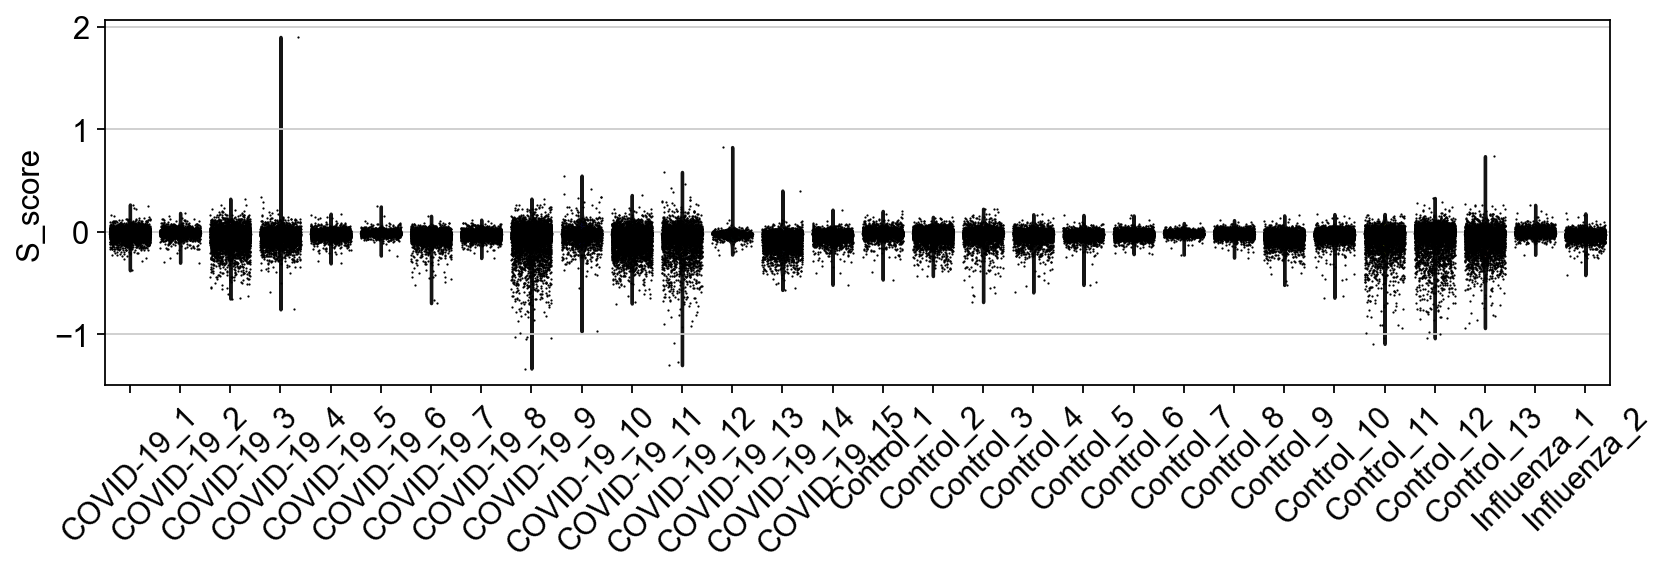

In [9]:
sc.set_figure_params(figsize=(10, 3))
sc.pl.violin(adata, ['S_score'],
             jitter=0.4, groupby = 'sample', rotation=45)

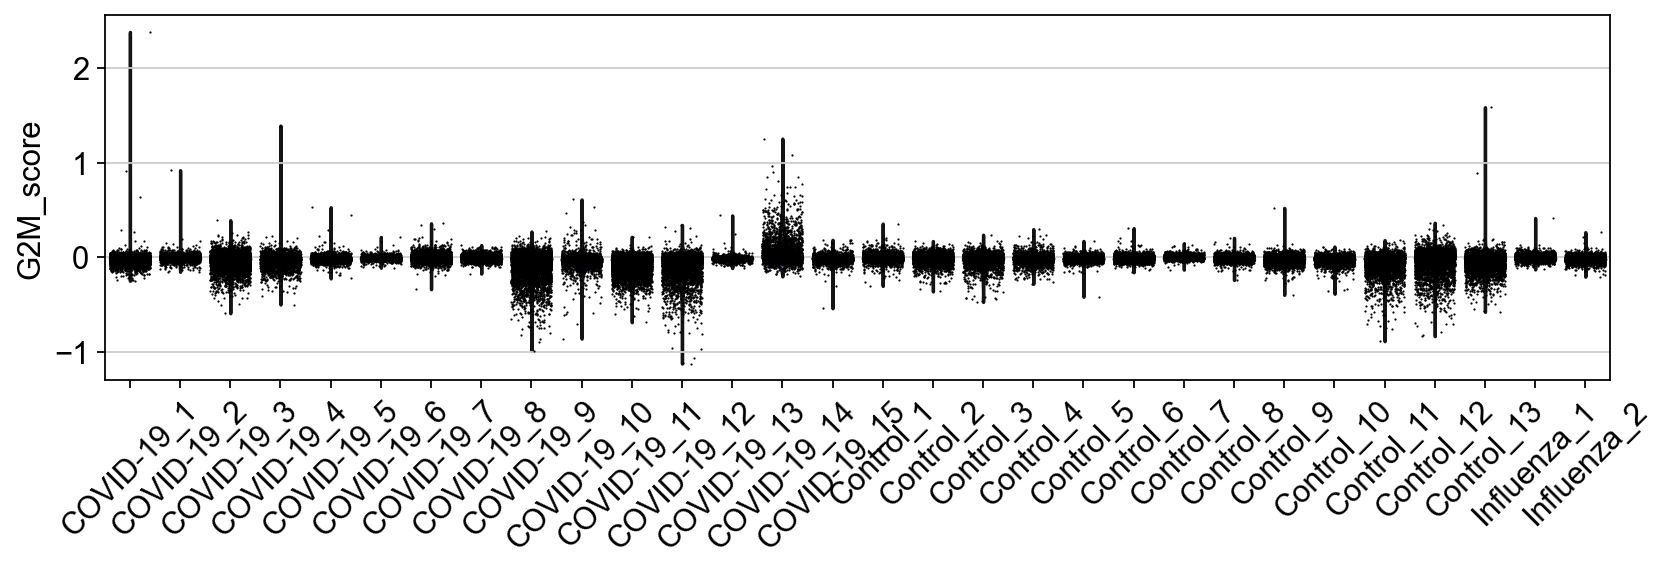

In [11]:
sc.pl.violin(adata, ['G2M_score'],
             jitter=0.4, groupby = 'sample', rotation=45)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.36
Detected doublet rate = 1.6%
Estimated detectable doublet fraction = 38.8%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 4.0%
Elapsed time: 282.3 seconds


1785

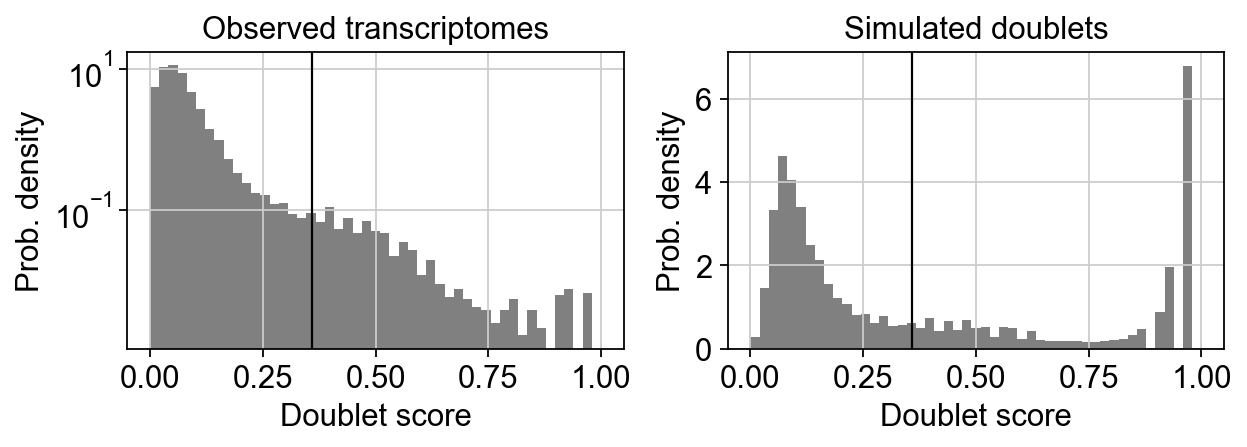

In [12]:
import scrublet as scr
scrub = scr.Scrublet(adata.raw.X)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

sum(adata.obs['predicted_doublets'])

In [13]:
# add in column with singlet/doublet instead of True/False
adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

In [14]:
adata.obs

sample  batch  n_genes_by_counts  total_counts  \
AAACCCAAGGCTTTCA   COVID-19_1      0               2089        3665.0   
AAACCCACAGGTATGG   COVID-19_1      0               1716        3132.0   
AAACCCATCGAGTACT   COVID-19_1      0               4228        9130.0   
AAACCCATCGTGGTAT   COVID-19_1      0                479         563.0   
AAACGAAAGAAGAACG   COVID-19_1      0               2468        4163.0   
...                       ...    ...                ...           ...   
TTTGGTTCACAACGCC  COVID-19_15     29               3667        8992.0   
TTTGGTTGTACAAGCG  COVID-19_15     29                602         856.0   
TTTGTTGAGCCGTAAG  COVID-19_15     29                958        1469.0   
TTTGTTGCAAGCGGAT  COVID-19_15     29               2297        5004.0   
TTTGTTGGTATACAGA  COVID-19_15     29                534         790.0   

                  total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAACCCAAGGCTTTCA              1.0       0.027285               11.0   
AAACCCACAGGTATGG              1.0       0.031928                8.0   
AAACCCATCGAGTACT             37.0       0.405257               34.0   
AAACCCATCGTGGTAT              0.0       0.000000                4.0   
AAACGAAAGAAGAACG              8.0       0.192169               35.0   
...                           ...            ...                ...   
TTTGGTTCACAACGCC            181.0       2.012900               86.0   
TTTGGTTGTACAAGCG             51.0       5.957944                6.0   
TTTGTTGAGCCGTAAG            131.0       8.917631                4.0   
TTTGTTGCAAGCGGAT            800.0      15.987210               35.0   
TTTGTTGGTATACAGA            120.0      15.189873               62.0   

                  pct_counts_ribo  total_counts_hb  pct_counts_hb  ...  \
AAACCCAAGGCTTTCA         0.300136              0.0       0.000000  ...   
AAACCCACAGGTATGG         0.255428              0.0       0.000000  ...   
AAACCCATCGAGTACT         0.372399              2.0       0.021906  ...   
AAACCCATCGTGGTAT         0.710480              0.0       0.000000  ...   
AAACGAAAGAAGAACG         0.840740              0.0       0.000000  ...   
...                           ...              ...            ...  ...   
TTTGGTTCACAACGCC         0.956406              2.0       0.022242  ...   
TTTGGTTGTACAAGCG         0.700935              0.0       0.000000  ...   
TTTGTTGAGCCGTAAG         0.272294              1.0       0.068074  ...   
TTTGTTGCAAGCGGAT         0.699440              0.0       0.000000  ...   
TTTGTTGGTATACAGA         7.848101              0.0       0.000000  ...   

                  n_counts  n_genes  percent_chrY  XIST-counts   S_score  \
AAACCCAAGGCTTTCA    3665.0     2089      0.111019          0.0 -0.041944   
AAACCCACAGGTATGG    3132.0     1716      0.449583          0.0 -0.028245   
AAACCCATCGAGTACT    9130.0     4228      0.146232          0.0 -0.011416   
AAACCCATCGTGGTAT     563.0      479      0.181818          0.0 -0.021918   
AAACGAAAGAAGAACG    4163.0     2468      0.049152          0.0  0.003457   
...                    ...      ...           ...          ...       ...   
TTTGGTTCACAACGCC    8992.0     3667      0.000000         12.0 -0.095173   
TTTGGTTGTACAAGCG     856.0      602      0.000000          2.0 -0.017808   
TTTGTTGAGCCGTAAG    1469.0      958      0.000000          3.0 -0.031507   
TTTGTTGCAAGCGGAT    5004.0     2297      0.000000          2.0 -0.035943   
TTTGTTGGTATACAGA     790.0      534      0.000000          0.0 -0.016438   

                  G2M_score  phase doublet_scores  predicted_doublets  \
AAACCCAAGGCTTTCA   0.004079    G2M       0.229535               False   
AAACCCACAGGTATGG  -0.055944     G1       0.019081               False   
AAACCCATCGAGTACT  -0.092075     G1       0.205493               False   
AAACCCATCGTGGTAT  -0.012821     G1       0.008637               False   
AAACGAAAGAAGAACG  -0.023310      S       0.109859               False   
...                     ...    ...            ...    

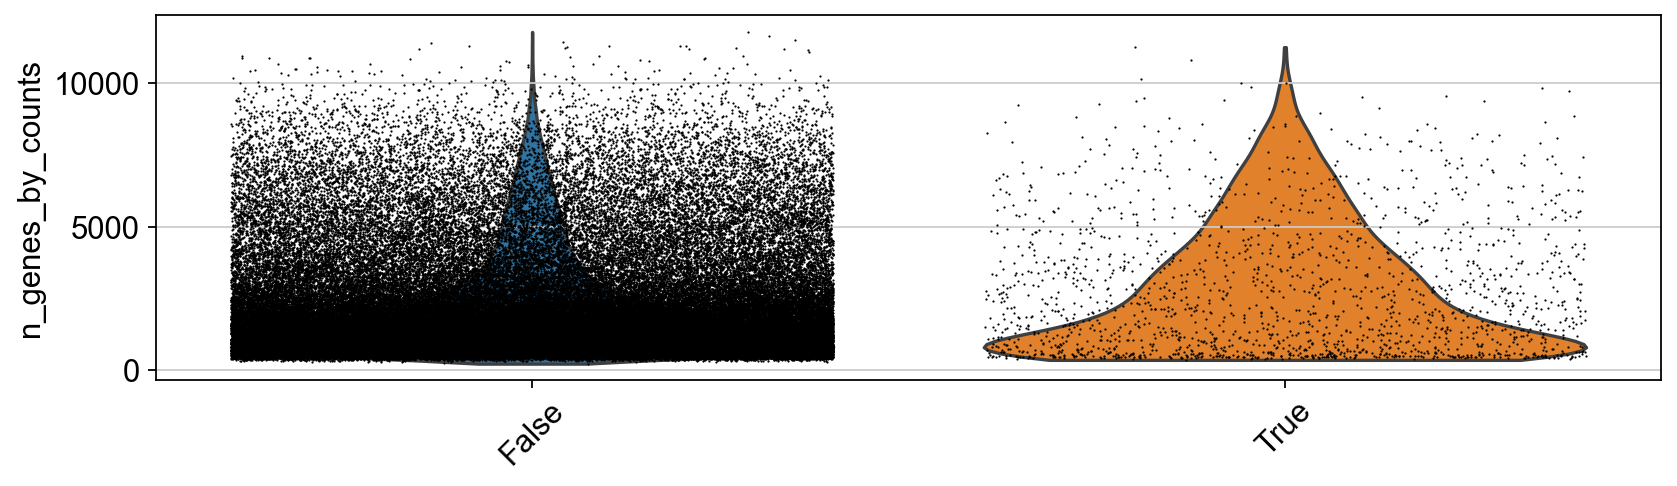

In [15]:
sc.pl.violin(adata, 'n_genes_by_counts',
             jitter=0.4, groupby = 'doublet_info', rotation=45)

In [17]:
adata.uns['log1p']["base"] = None

In [18]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]

extracting highly variable genes


: 

: 